# **R Laboratory Session 03**
### *Course:* Advanced Statistics for Physics Analysis, University of Padua, A.Y. 2021/22
### *Student:* Daniele Ninni
***
## **Table of Contents**
1) [**Triangular Distribution**](#sec1)
    - [1.A](#sec1.A)
    - [1.B](#sec1.B)
    - [1.C](#sec1.C)
2) [**Markov’s Inequality**](#sec2)
    - [2.A](#sec2.A)
    - [2.B](#sec2.B)
    - [2.C](#sec2.C)
    - [2.D](#sec2.D)
3) [**Chebyshev’s Inequality**](#sec3)
    - [3.A](#sec3.A)
    - [3.B](#sec3.B)
    - [3.C](#sec3.C)
    - [3.D](#sec3.D)
4) [**Six Boxes Toy Model: Inference**](#sec4)
5) [**Six Boxes Toy Model: Simulation**](#sec5)
***

In [1]:
# load packages
library(tidyverse)
library(GoFKernel) # to use 'inverse' (calculates the inverse function of a CDF)

# set plot options (global)
theme_set(theme_bw(base_size=8))
options(
    repr.plot.width=7,  # plotting area width in inches  (default:   7)
    repr.plot.height=4, # plotting area height in inches (default:   7)
    repr.plot.res=300   # PPI for rasterization          (default: 120)
)

# set random seed for reproducibility
set.seed(5)

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.8
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Caricamento del pacchetto richiesto: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009



<a id='sec1'></a>
## **Exercise 1** - Triangular Distribution

The triangular distribution, in the interval $[a,b]$, is given by the following:

$$
f(x) =
\begin{cases}
    \frac{2(x-a)}{(b-a)(c-a)} & a \leq x < c\\
    \frac{2(b-x)}{(b-a)(b-c)} & c \leq x \leq b\\
    0                         & \text{otherwise}
\end{cases}
$$

where $c \in [a,b]$.

<a id='sec1.A'></a>
### **1.A** Plot the function, given the interval $[a,b]$

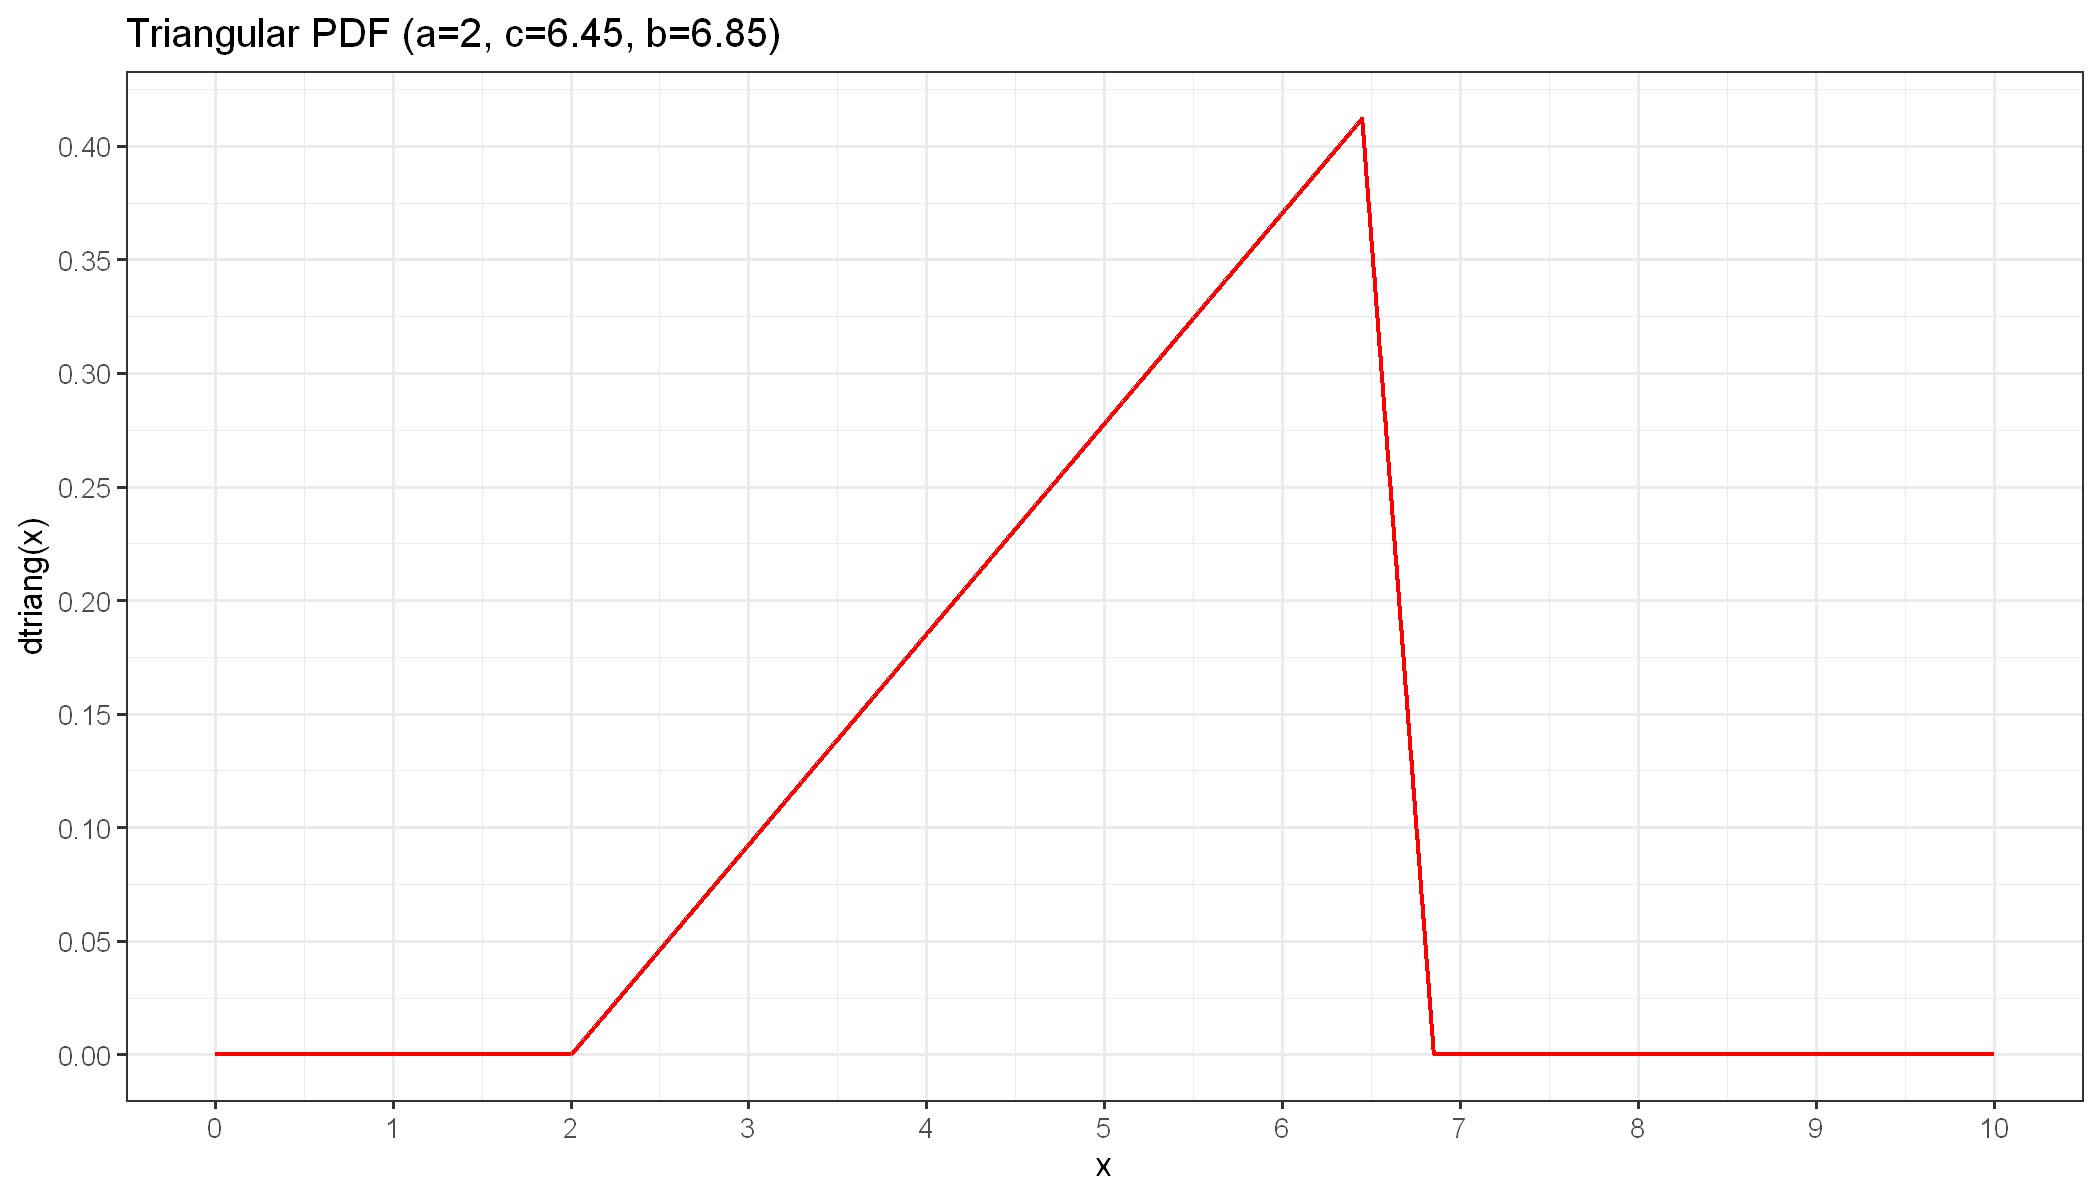

In [2]:
# PDF
dtriang <- function(x, a=0, b=1, c=(a+b)/2) {
            if      (c<a | c>b)   stop('c is not in [a,b]')
            else if (a<=x & x<c)  2*(x-a)/((b-a)*(c-a))
            else if (c<=x & x<=b) 2*(b-x)/((b-a)*(b-c))
            else                  0
            }
dtriang <- Vectorize(dtriang)

x_low <- 0
x_high <- 10
N <- 10^4
x <- seq(x_low, x_high, length=N)
ab <- runif(2, min=x_low, max=x_high)
a <- min(ab)
b <- max(ab)
c <- runif(1, min=a, max=b)

ggplot() +
    geom_line(aes(x=x, y=dtriang(x, a, b, c)), colour='red', size=.5) +
    scale_x_continuous(n.breaks=11) +
    scale_y_continuous(n.breaks=9) +
    xlab('x') +
    ylab('dtriang(x)') +
    ggtitle(paste('Triangular PDF (a=', round(a, 2), ', c=', round(c, 2), ', b=', round(b, 2), ')', sep=''))

<a id='sec1.B'></a>
### **1.B** Write an algorithm to generate random numbers from the triangular distribution

Since the triangular PDF is analytically integrable, it makes sense to use the **inverse transform sampling method**.

Let's determine the triangular CDF analytically:

- $
\text{for} \; x \leq a \; :
F(x) = 0
$

- $
\text{for} \; a < x \leq c \; :
F(x) = \int_{a}^{x} f(x') \,dx' =
       \int_{a}^{x} \frac{2(x'-a)}{(b-a)(c-a)} \,dx' =
       \frac{2}{(b-a)(c-a)} \left[\frac{x'^2}{2}-ax'\right]_a^x =
       \ldots =
       \frac{(x-a)^2}{(b-a)(c-a)}
$

- $
\text{for} \; c < x < b \; :
F(x) = \frac{c-a}{b-a} + \int_{c}^{x} f(x') \,dx' =
       \frac{c-a}{b-a} + \int_{c}^{x} \frac{2(b-x')}{(b-a)(b-c)} \,dx' =
       \frac{c-a}{b-a} + \frac{2}{(b-a)(b-c)} \left[bx'-\frac{x'^2}{2}\right]_c^x =
       \ldots =
       1 - \frac{(b-x)^2}{(b-a)(b-c)}
$

- $
\text{for} \; x \geq b \; :
F(x) = 1
$

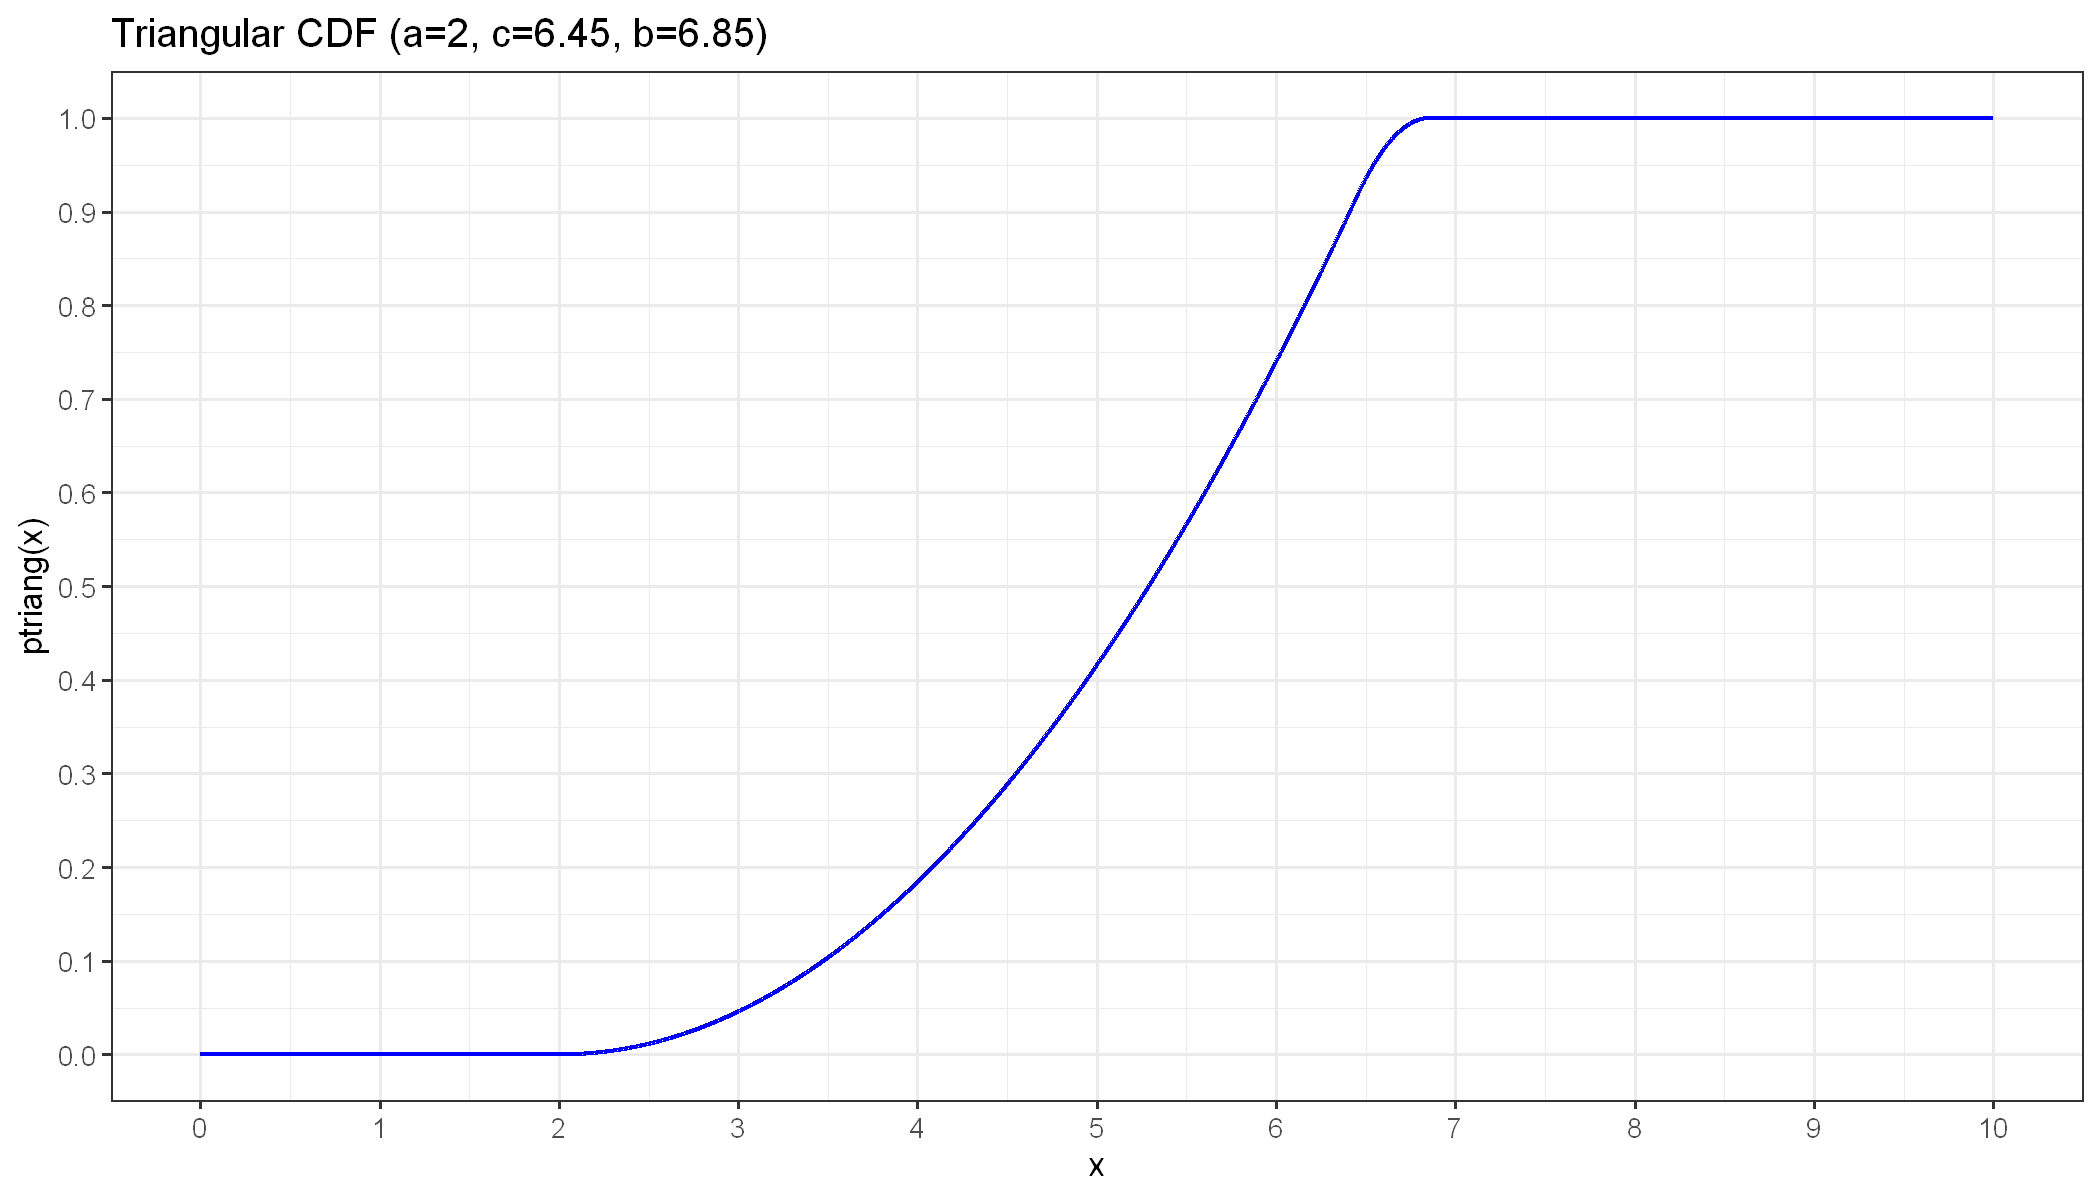

In [3]:
# CDF
ptriang <- function(x, a=0, b=1, c=(a+b)/2) {
            if      (c<a | c>b)   stop('c is not in [a,b]')
            else if (x<=a)        0
            else if (a<x & x<=c)  ((x-a)^2)/((b-a)*(c-a))
            else if (c<x & x<b)   1-(((b-x)^2)/((b-a)*(b-c)))
            else                  1
            }
ptriang <- Vectorize(ptriang)

# quantile function
qtriang <- Vectorize(inverse(function(x) ptriang(x, a=a, b=b, c=c), lower=a, upper=b))

# sampling from the distribution
rtriang <- function(n) {qtriang(runif(n))}

ggplot() +
    geom_line(aes(x=x, y=ptriang(x, a, b, c)), colour='blue', size=.5) +
    scale_x_continuous(n.breaks=11) +
    scale_y_continuous(n.breaks=11) +
    xlab('x') +
    ylab('ptriang(x)') +
    ggtitle(paste('Triangular CDF (a=', round(a, 2), ', c=', round(c, 2), ', b=', round(b, 2), ')', sep=''))

<a id='sec1.C'></a>
### **1.C** Generate $10^4$ random numbers from the distribution, show them in an histogram and superimpose the analytical curve

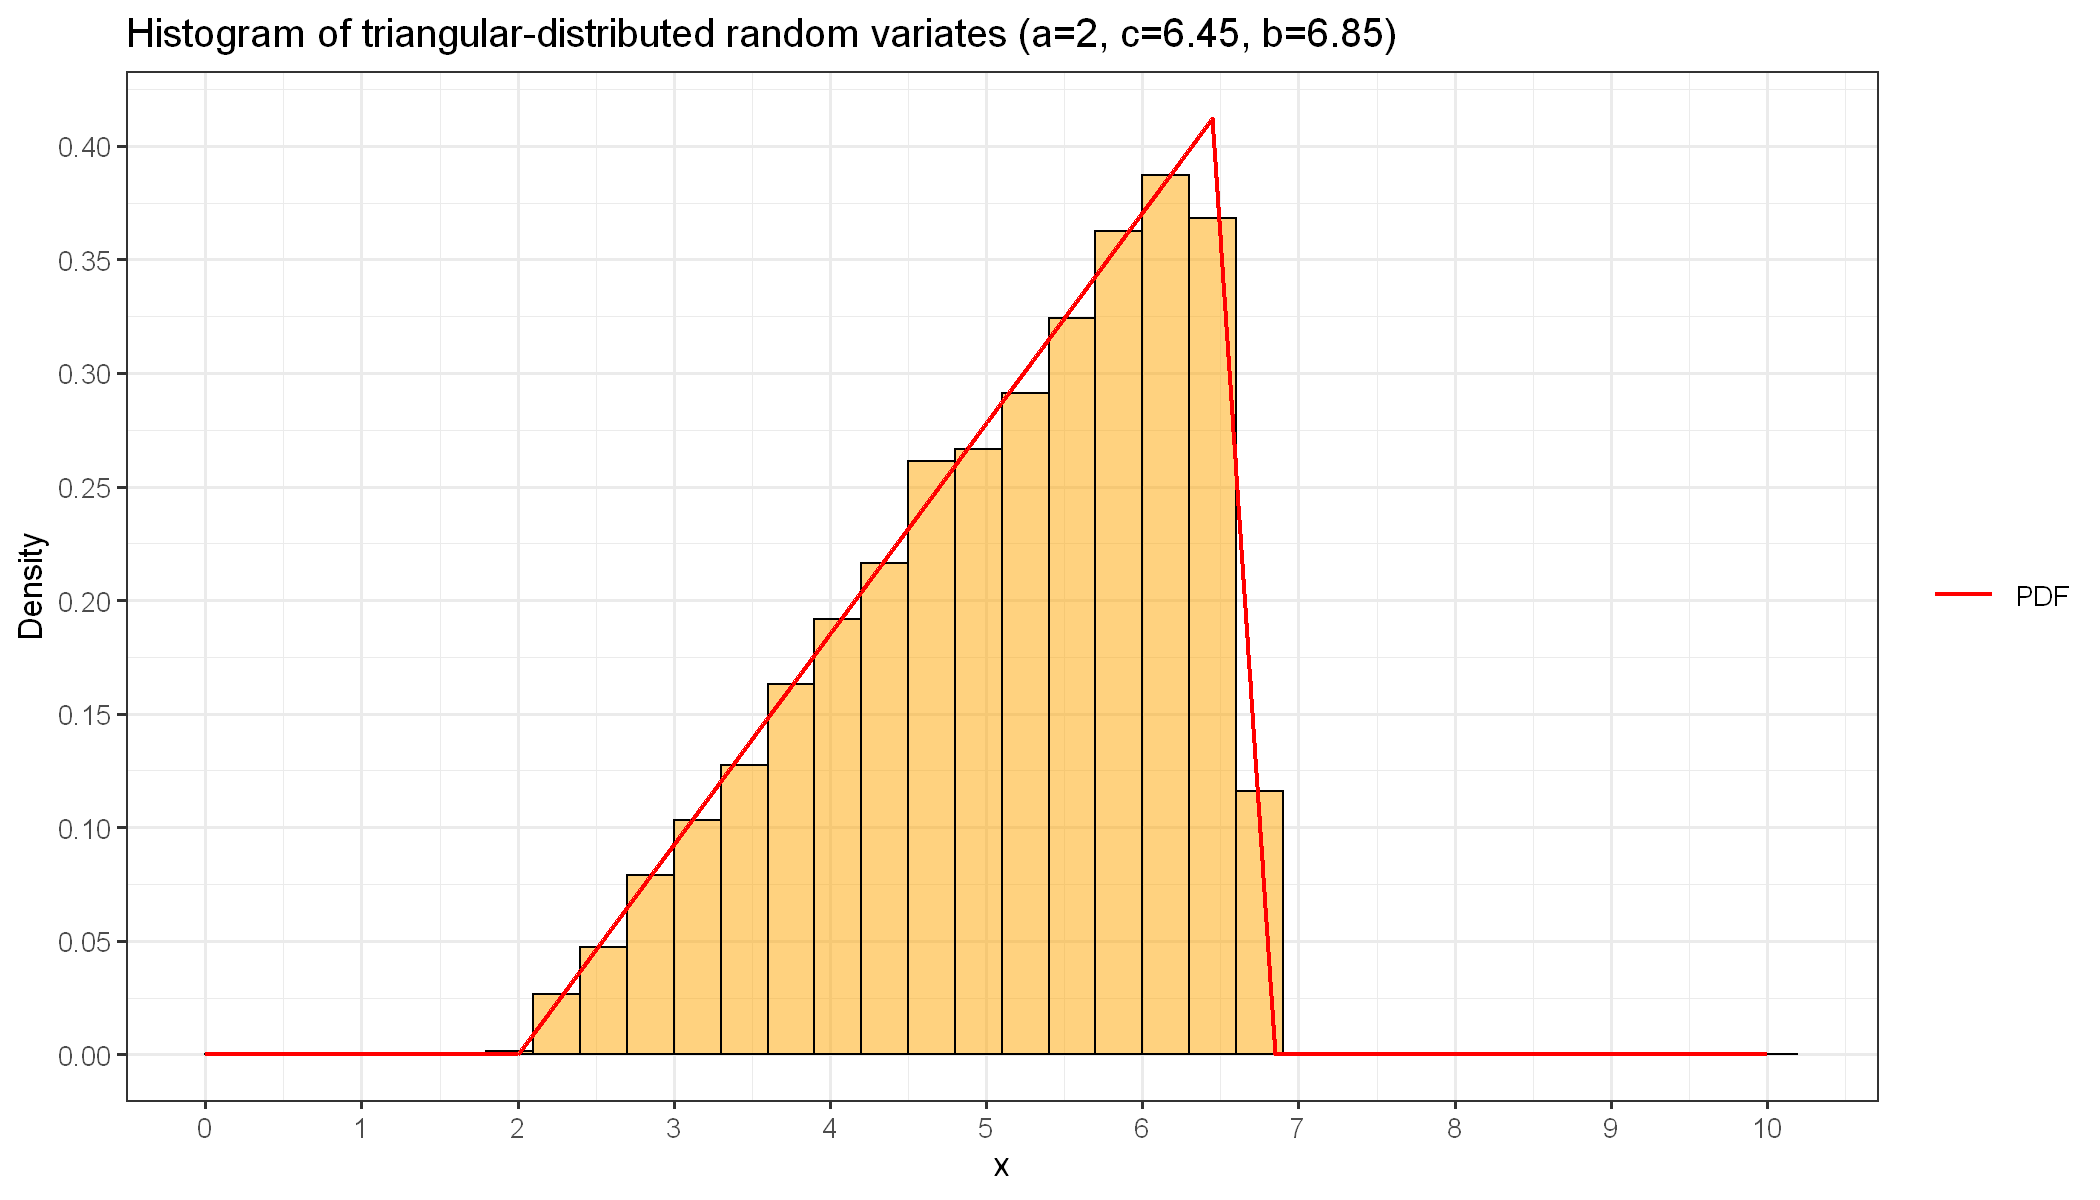

In [4]:
ggplot() +
    geom_histogram(aes(x=rtriang(10^4), y=..density..), alpha=.5, colour='black', fill='orange', size=.3, binwidth=.3, boundary=0) +
    geom_line(aes(x=x, y=dtriang(x, a, b, c), colour='PDF'), size=.5) +
    scale_color_manual(values=c('PDF'='red'), labels=c('PDF')) +
    scale_x_continuous(n.breaks=11) +
    scale_y_continuous(n.breaks=9) +
    xlab('x') +
    ylab('Density') +
    labs(colour=NULL) +
    ggtitle(paste('Histogram of triangular-distributed random variates (a=', round(a, 2), ', c=', round(c, 2), ', b=', round(b, 2), ')', sep=''))

<a id='sec2'></a>
## **Exercise 2** - Markov’s Inequality

Markov’s inequality represents an upper bound to probability distributions:

$$
P(X \geq k) \leq \frac{E[X]}{k} \; \text{for} \; k > 0
$$

- ### Having defined a function $$G(k) = 1-F(k) \equiv P(X \geq k)$$ plot $G(k)$ and the Markov’s upper bound for the following distribution functions:

In [5]:
plot_markov <- function(k, cdf, pdf_mean, x_n.breaks=11, y_n.breaks=11, title=NULL) {

                if (any(k<=0)) stop('there is at least one value of k which is non-positive')

                tbl <- tibble(k, 'G(k) = 1 - CDF(k)'=1-cdf, "Markov's upper bound"=pdf_mean/k) %>%
                        pivot_longer(!k, names_to='function', values_to='value')

                ggplot(data=tbl, aes(x=k, y=value, group=`function`, colour=`function`)) +
                        geom_line(na.rm=T, size=.5) +
                        scale_x_continuous(n.breaks=x_n.breaks) +
                        scale_y_continuous(n.breaks=y_n.breaks, limits = c(NA, 2)) +
                        ylab(NULL) +
                        labs(colour=NULL) +
                        theme(legend.text=element_text(size=6)) +
                        ggtitle(title)
                        
                }

<a id='sec2.A'></a>
### **2.A** Exponential, $Exp(\lambda = 1)$

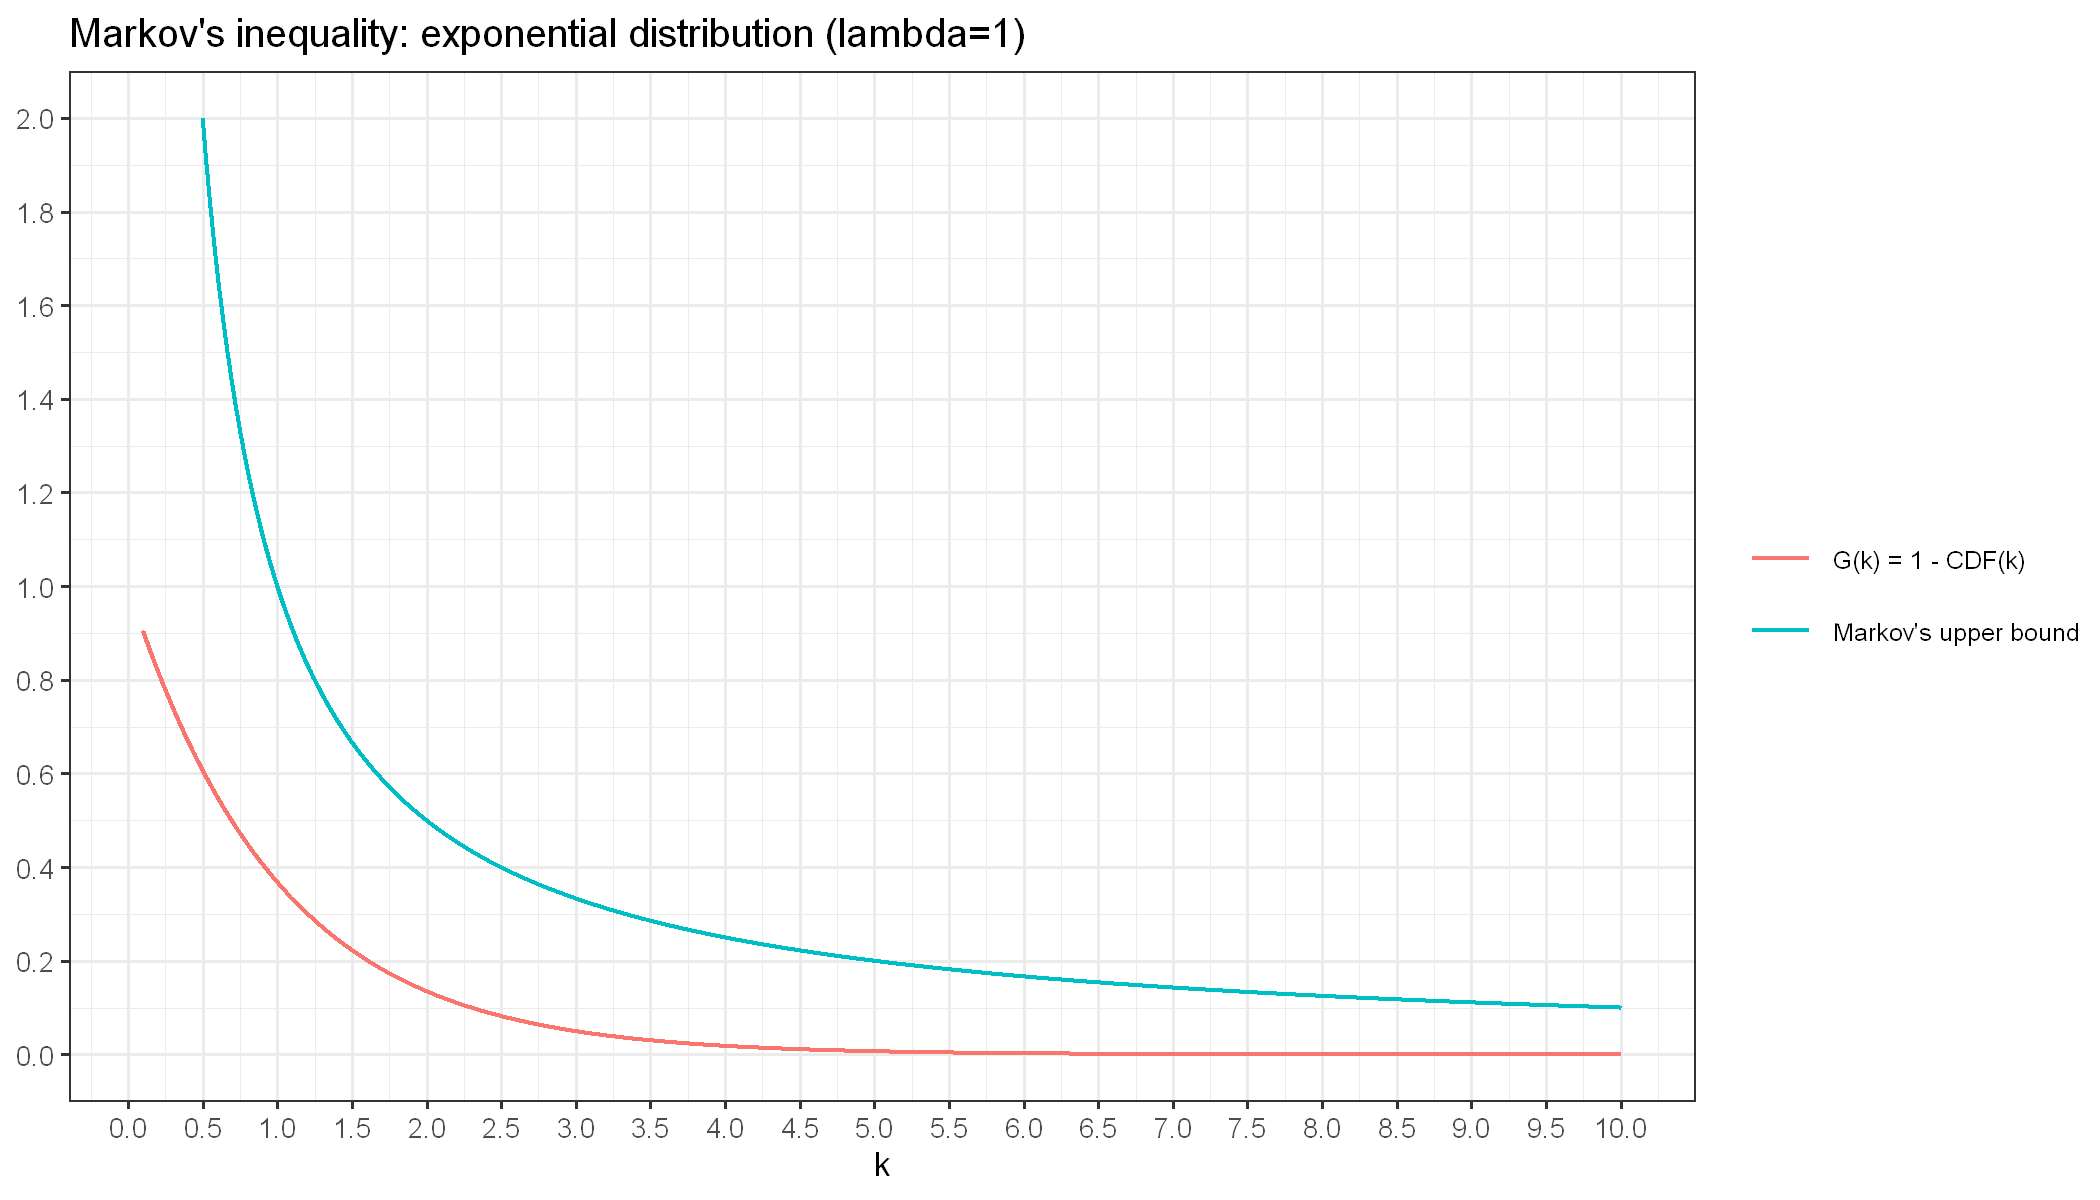

In [6]:
exp_lambda <- 1 # rate
exp_mean <- 1/exp_lambda # expected value

k <- seq(0.1, 10, length=10^4)
exp_title <- paste("Markov's inequality: exponential distribution (lambda=", exp_lambda, ')', sep='')

plot_markov(k=k, cdf=pexp(k, rate=exp_lambda), pdf_mean=exp_mean, x_n.breaks=21, y_n.breaks=11, title=exp_title)

<a id='sec2.B'></a>
### **2.B** Uniform, $\mathcal{U}(3,5)$

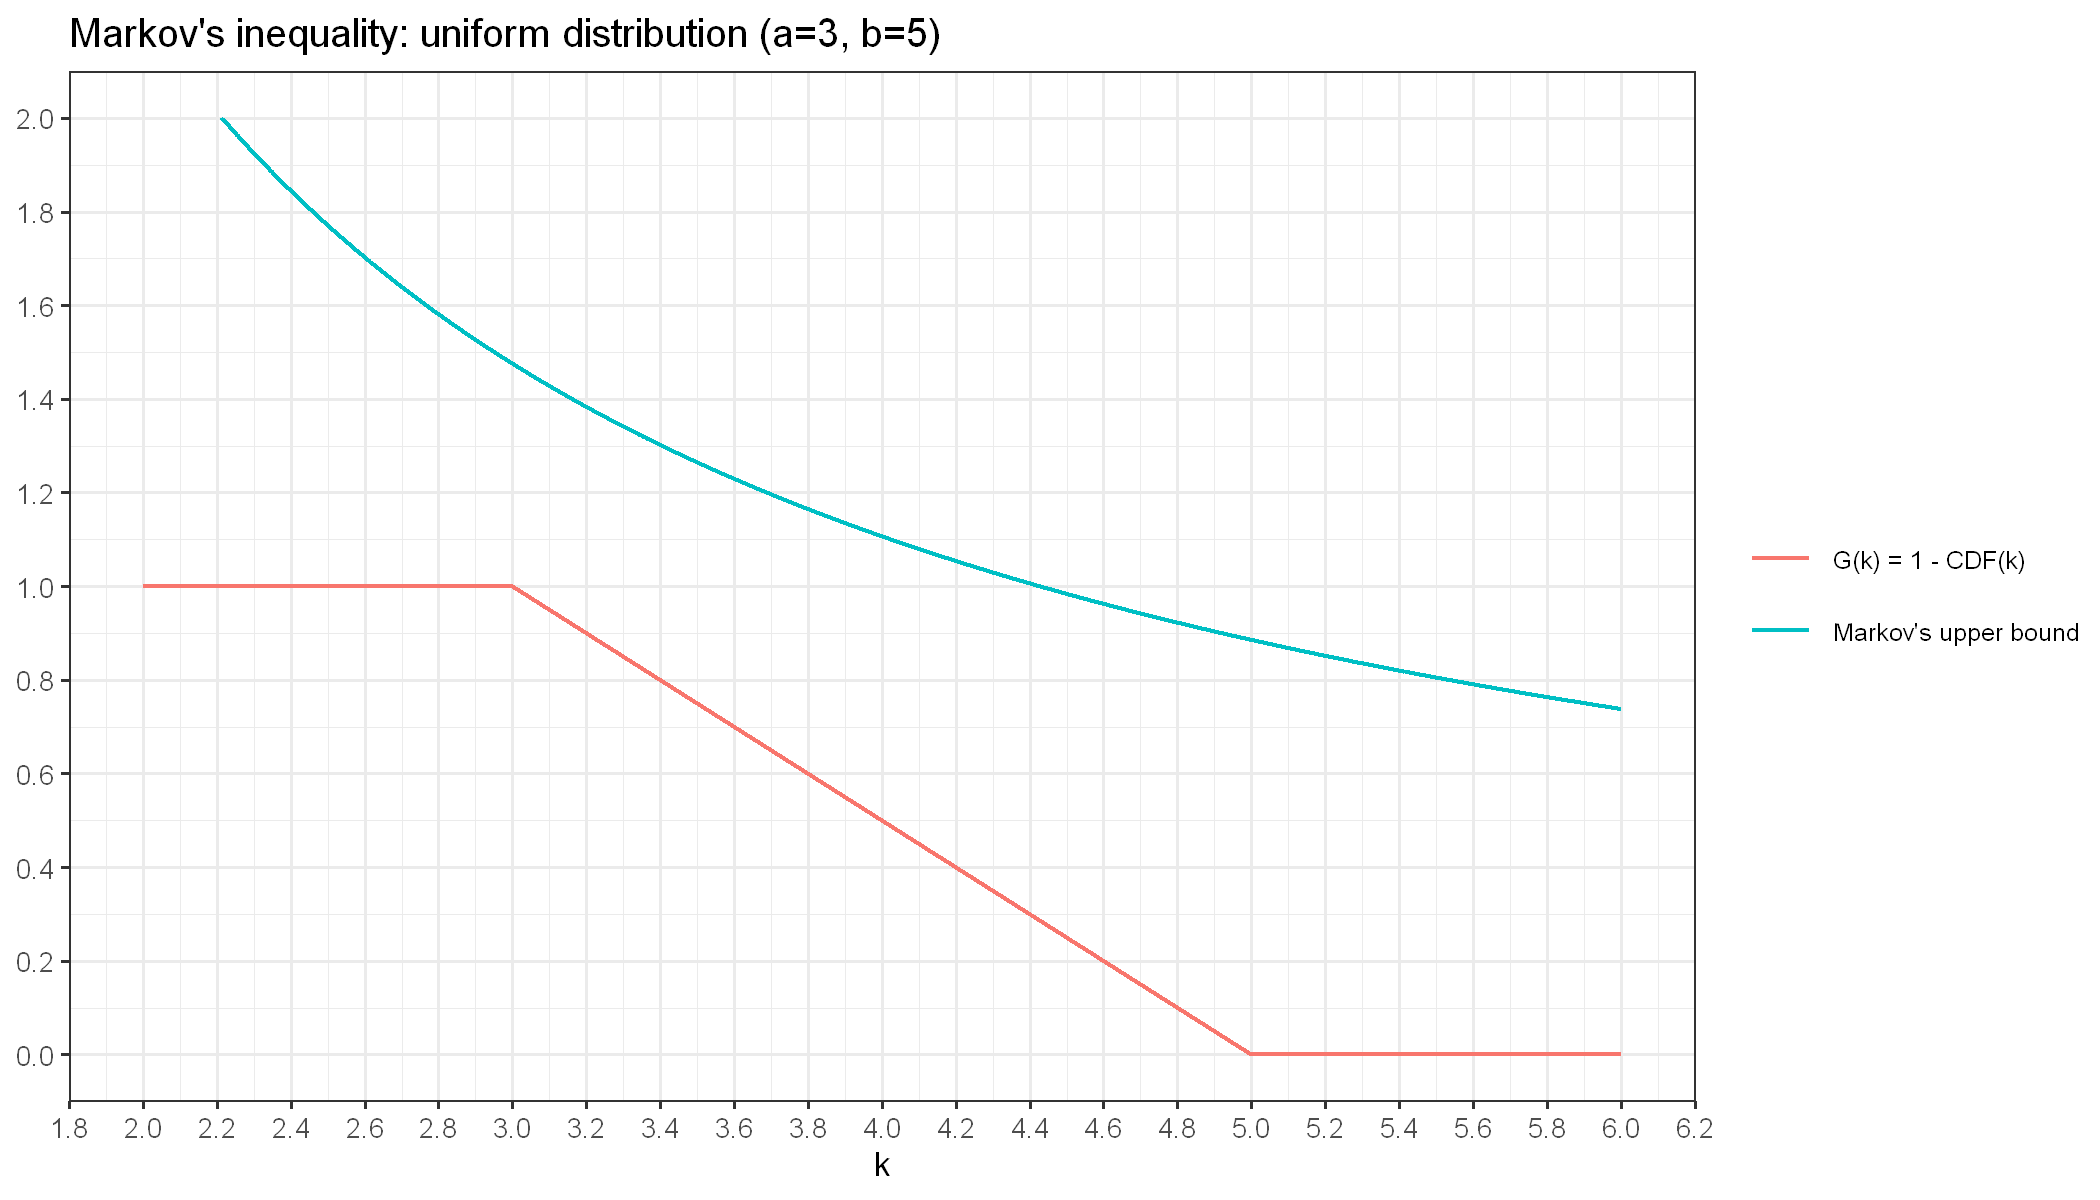

In [7]:
unif_a <- 3 # lower limit
unif_b <- 5 # upper limit
unif_mean <- (a+b)/2 # expected value

k <- seq(unif_a-1, unif_b+1, length=10^4)
unif_title <- paste("Markov's inequality: uniform distribution (a=", unif_a, ", b=", unif_b, ')', sep='')

plot_markov(k=k, cdf=punif(k, min=unif_a, max=unif_b), pdf_mean=unif_mean, x_n.breaks=23, y_n.breaks=11, title=unif_title)

<a id='sec2.C'></a>
### **2.C** Binomial, $Bin(n = 1, p = 1/2)$

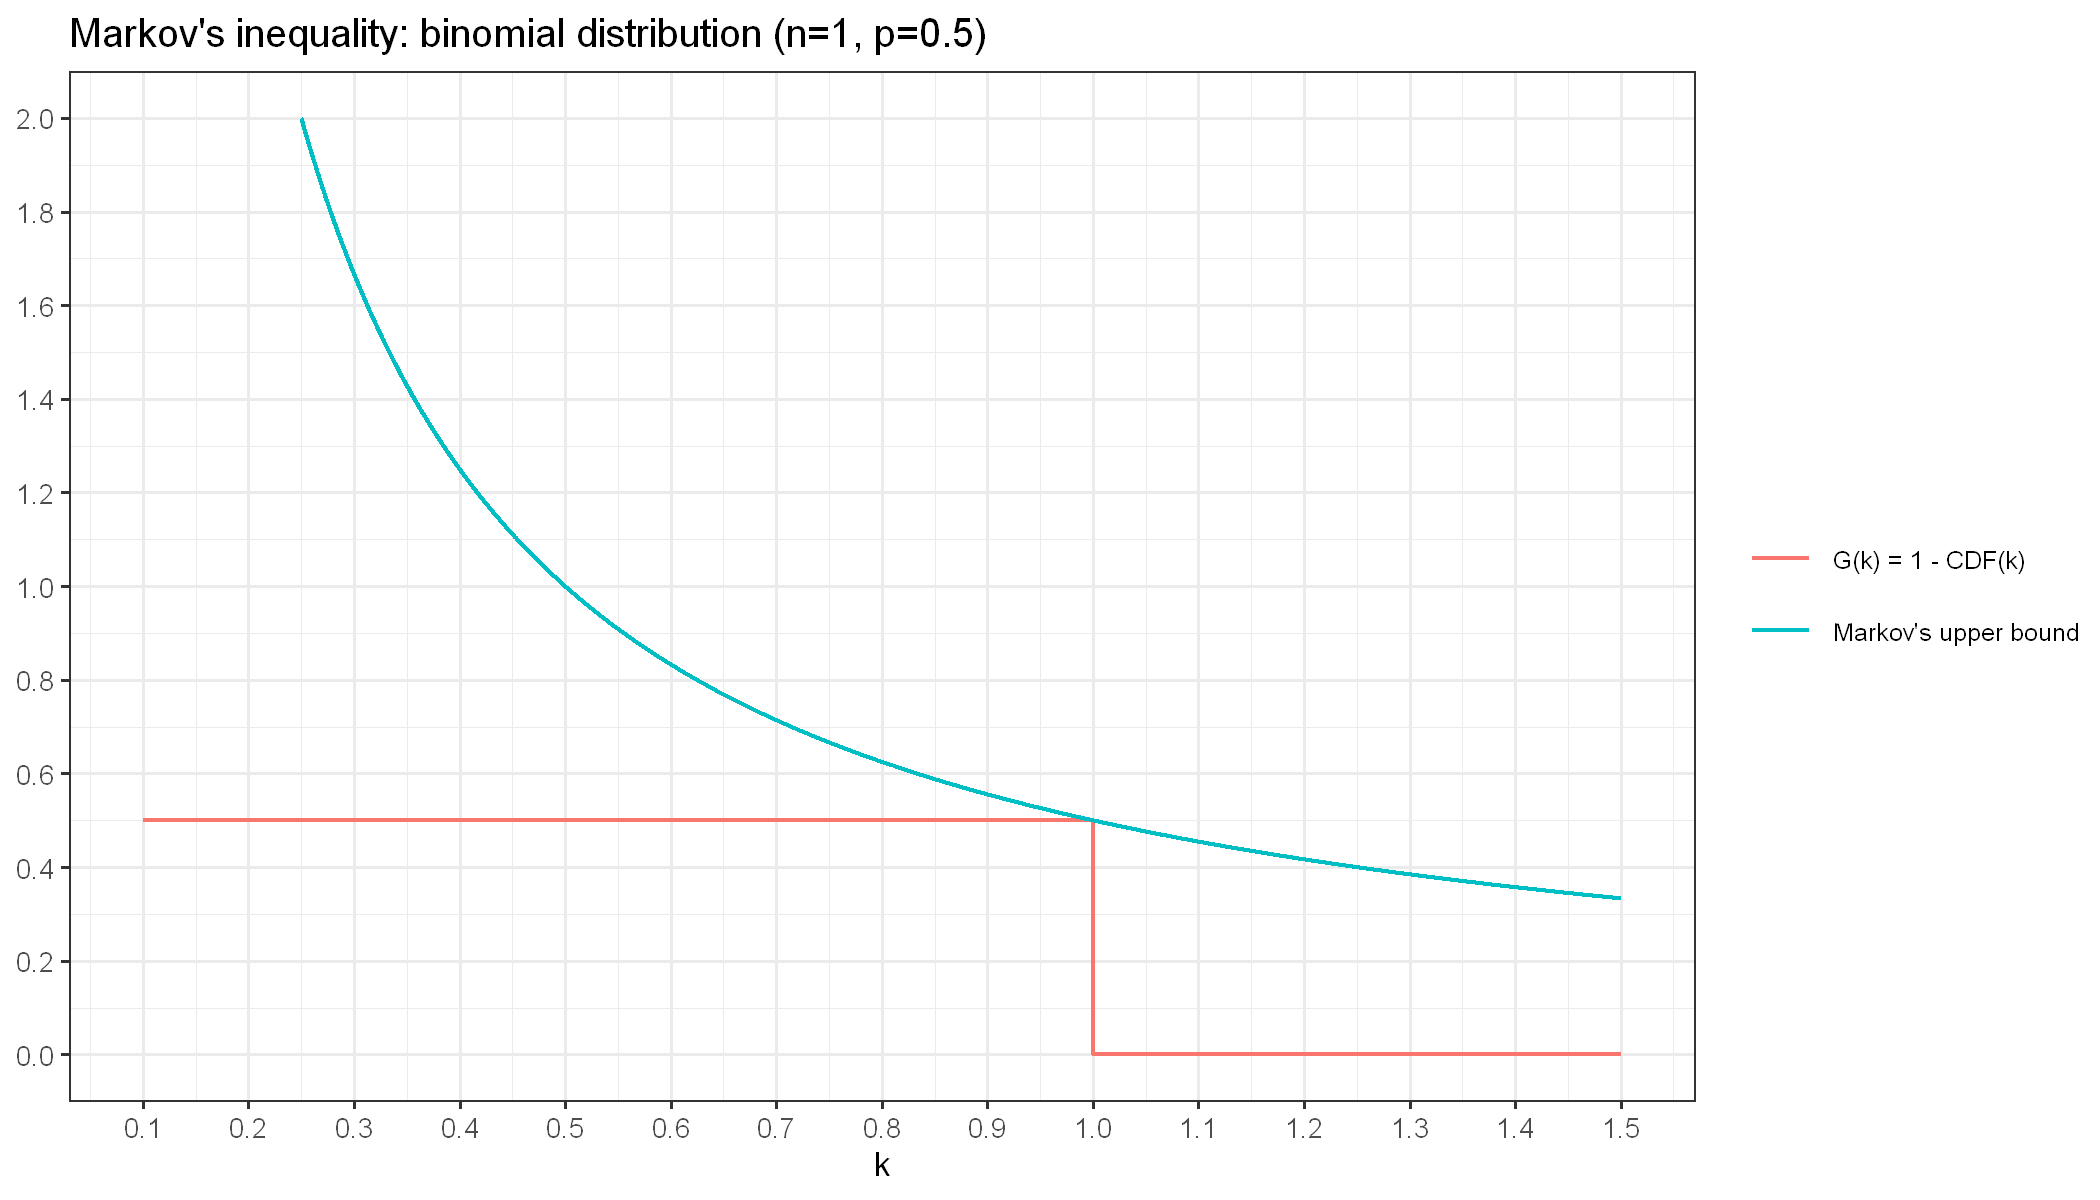

In [8]:
binom_n <- 1 # number of trials
binom_p <- 1/2 # success probability for each trial
binom_mean <- binom_n*binom_p # expected value

k <- seq(0.1, binom_mean+1, length=10^4)
binom_title <- paste("Markov's inequality: binomial distribution (n=", binom_n, ", p=", binom_p, ')', sep='')

plot_markov(k=k, cdf=pbinom(k, size=binom_n, prob=binom_p), pdf_mean=binom_mean, x_n.breaks=15, y_n.breaks=11, title=binom_title)

<a id='sec2.D'></a>
### **2.D** Poisson, $Pois(\lambda = 1/2)$

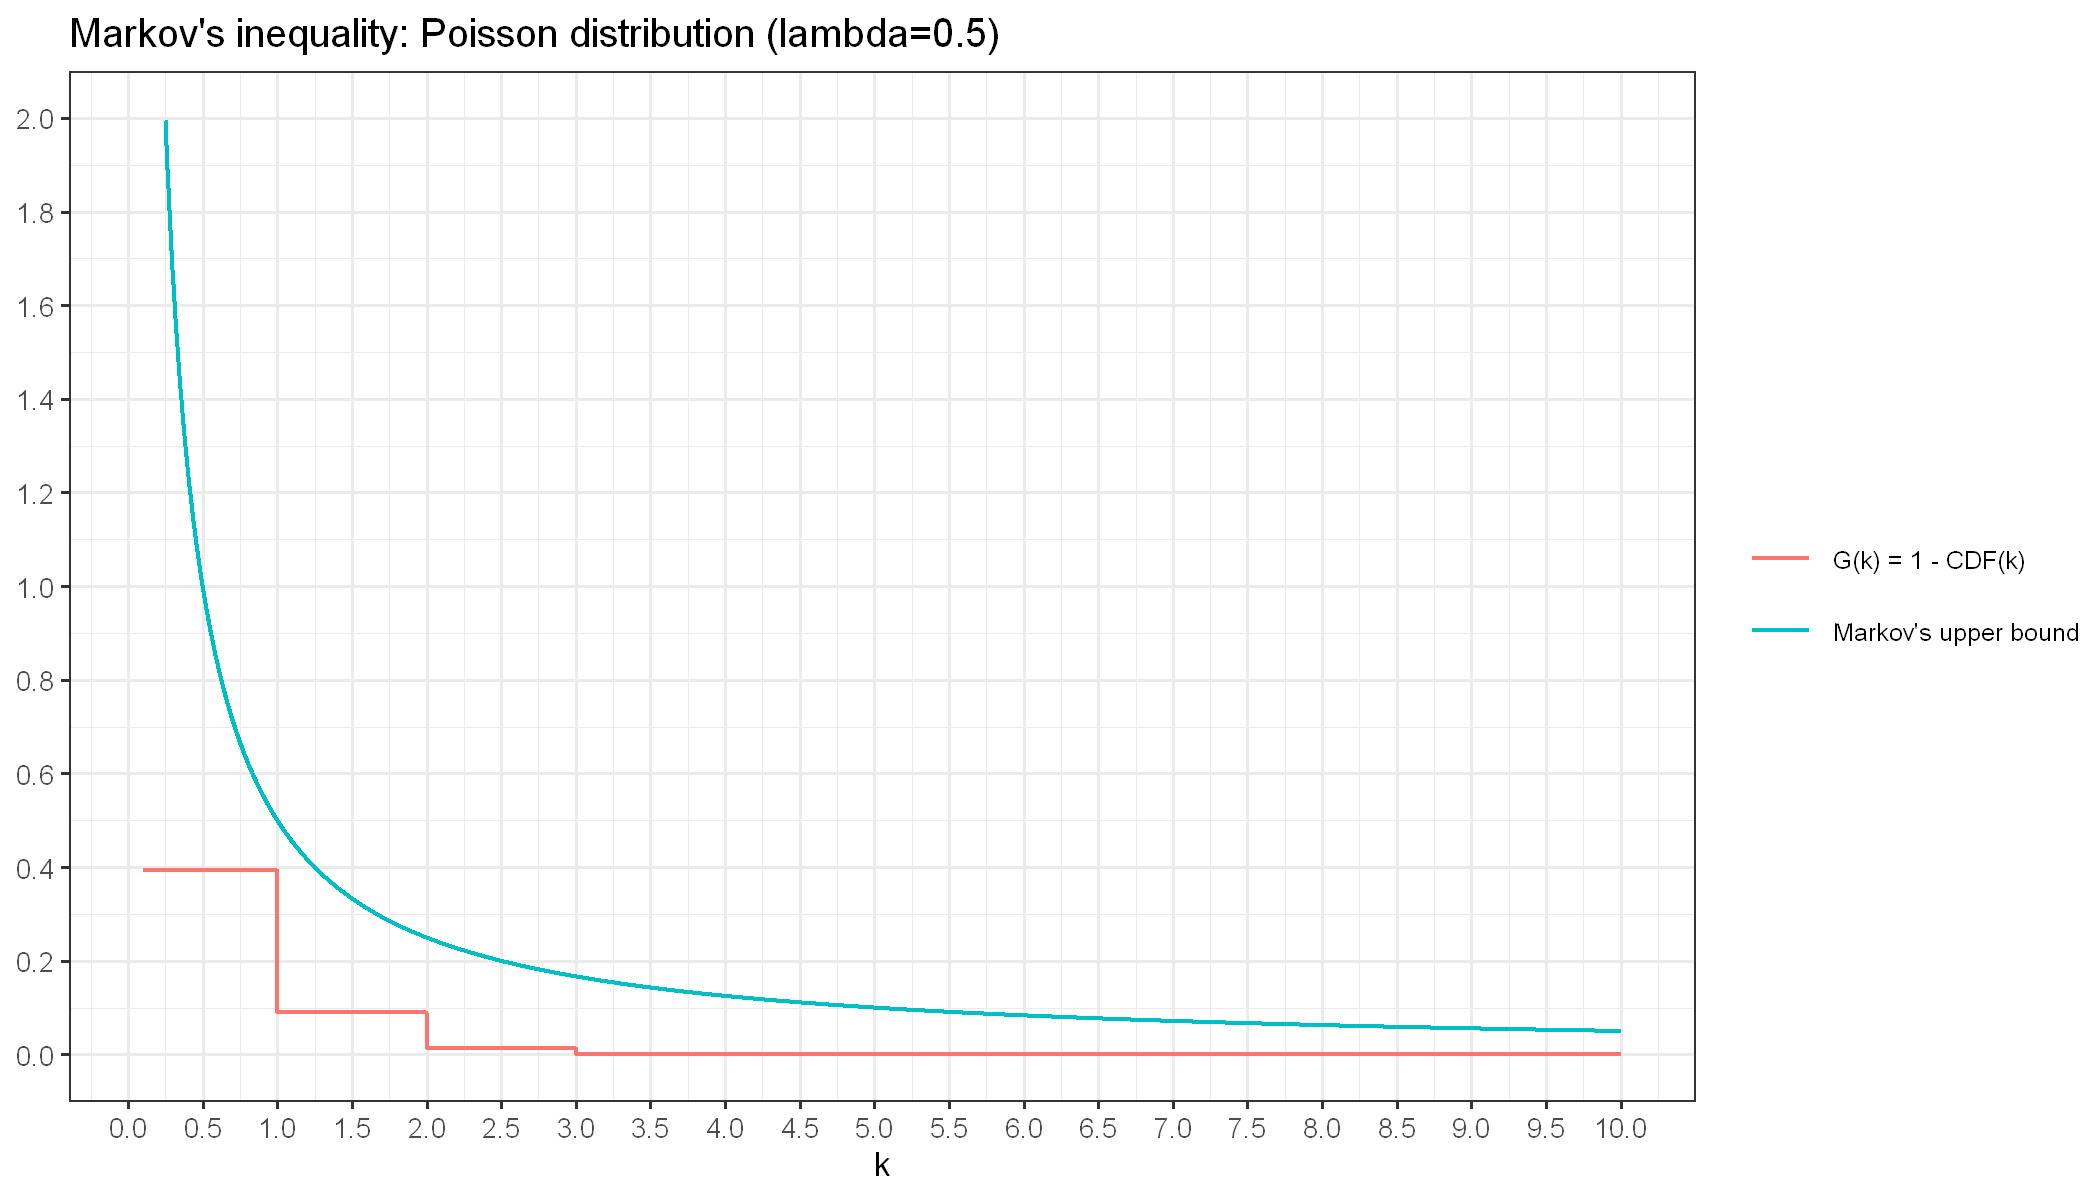

In [9]:
pois_lambda <- 1/2 # rate
pois_mean <- pois_lambda # expected value

k <- seq(0.1, 10, length=10^4)
pois_title <- paste("Markov's inequality: Poisson distribution (lambda=", pois_lambda, ')', sep='')

plot_markov(k=k, cdf=ppois(k, lambda=pois_lambda), pdf_mean=pois_mean, x_n.breaks=21, y_n.breaks=11, title=pois_title)

<a id='sec3'></a>
## **Exercise 3** - Chebyshev’s Inequality

Chebyshev’s inequality tell us that

$$
P(|X - \mu| \geq k \sigma) \leq \frac{1}{k^2}
$$

which can also be written as

$$
P(|X - \mu| < k \sigma) \geq 1 - \frac{1}{k^2}
$$

- ### Use R to show, with a plot, that Chebyshev’s inequality is an upper bound to the following distributions:

Note that

$$
P(|X - \mu| \geq k \sigma) =
P(X - \mu \leq -k \sigma \lor X - \mu \geq k \sigma) =
P(X - \mu \leq -k \sigma) + P(X - \mu \geq k \sigma)
$$

where

- $P(X - \mu \leq -k \sigma) = P(X \leq \mu -k \sigma) = CDF(\mu -k \sigma)$

- $P(X - \mu \geq k \sigma) = P(X \geq \mu +k \sigma) = 1 - P(X < \mu +k \sigma) \approx 1 - CDF(\mu +k \sigma)$

Therefore

$$
P(|X - \mu| \geq k \sigma) \approx
1 + CDF(\mu -k \sigma) - CDF(\mu +k \sigma) \leq \frac{1}{k^2}
$$

In [10]:
plot_chebyshev <- function(k, cdf, pdf_mean, pdf_stdev, x_n.breaks=11, y_n.breaks=11, title=NULL) {

                        if (any(k<=0)) stop('there is at least one value of k which is non-positive')

                        tbl <- tibble(k, 'P(|X - mu|) >= k*sigma'=1+cdf(pdf_mean-k*pdf_stdev)-cdf(pdf_mean+k*pdf_stdev), "Chebyshev's upper bound"=1/(k^2)) %>%
                                pivot_longer(!k, names_to='function', values_to='value')

                        ggplot(data=tbl, aes(x=k, y=value, group=`function`, colour=`function`)) +
                                geom_line(na.rm=T, size=.5) +
                                scale_x_continuous(n.breaks=x_n.breaks) +
                                scale_y_continuous(n.breaks=y_n.breaks, limits = c(NA, 2)) +
                                ylab(NULL) +
                                labs(colour=NULL) +
                                theme(legend.text=element_text(size=6)) +
                                ggtitle(title)
                        
                }

<a id='sec3.A'></a>
### **3.A** Normal, $N(\mu = 3, \sigma = 5)$

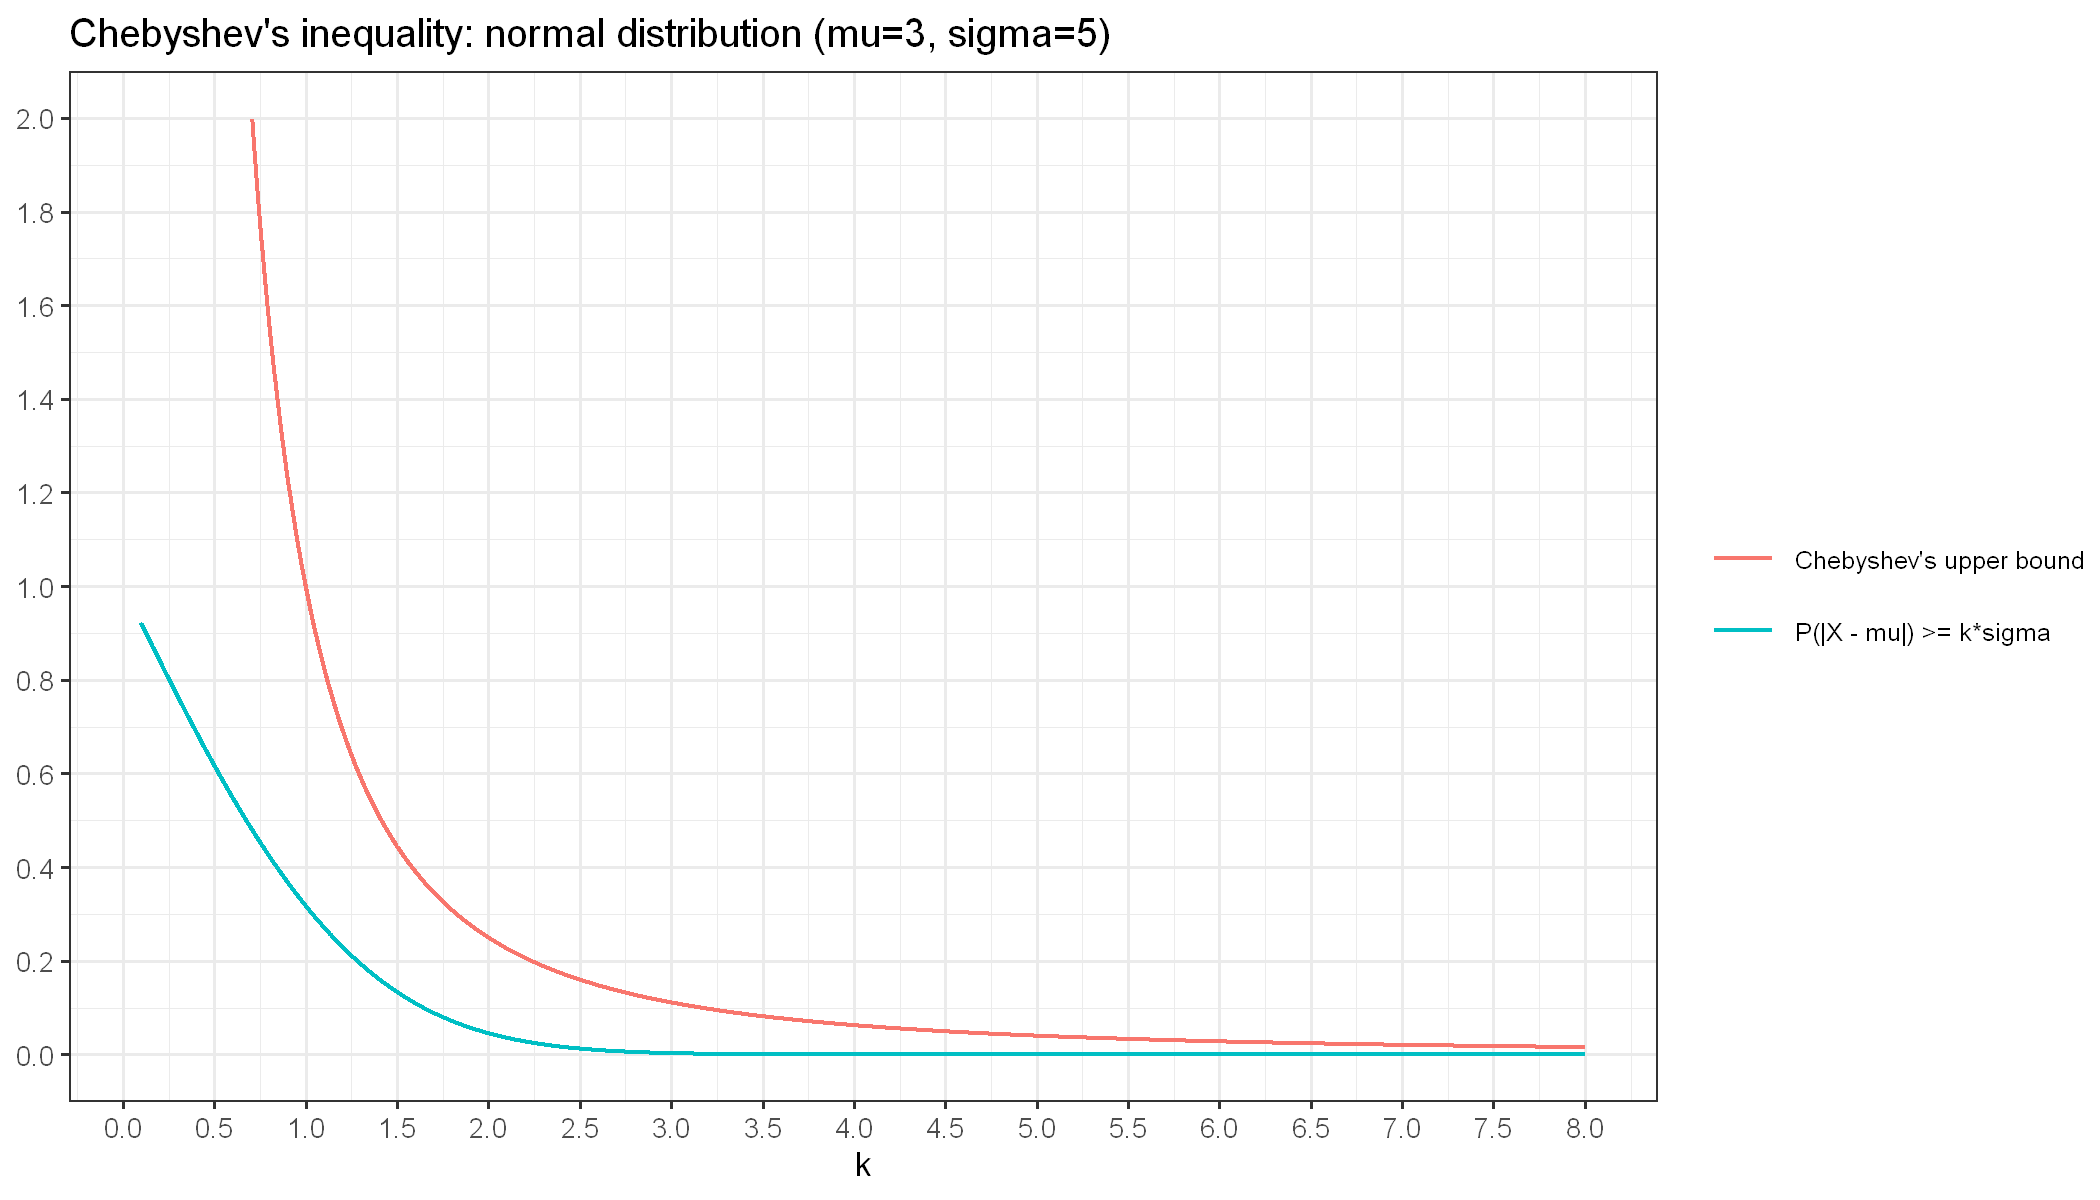

In [11]:
norm_mean <- 3 # expected value
norm_stdev <- 5 # standard deviation

k <- seq(0.1, norm_mean+norm_stdev, length=10^4)
norm_title <- paste("Chebyshev's inequality: normal distribution (mu=", norm_mean, ", sigma=", norm_stdev, ')', sep='')

plot_chebyshev(k=k, cdf=function(k) pnorm(k, mean=norm_mean, sd=norm_stdev), pdf_mean=norm_mean, pdf_stdev=norm_stdev, x_n.breaks=17, y_n.breaks=11, title=norm_title)

<a id='sec3.B'></a>
### **3.B** Exponential, $Exp(\lambda = 1)$

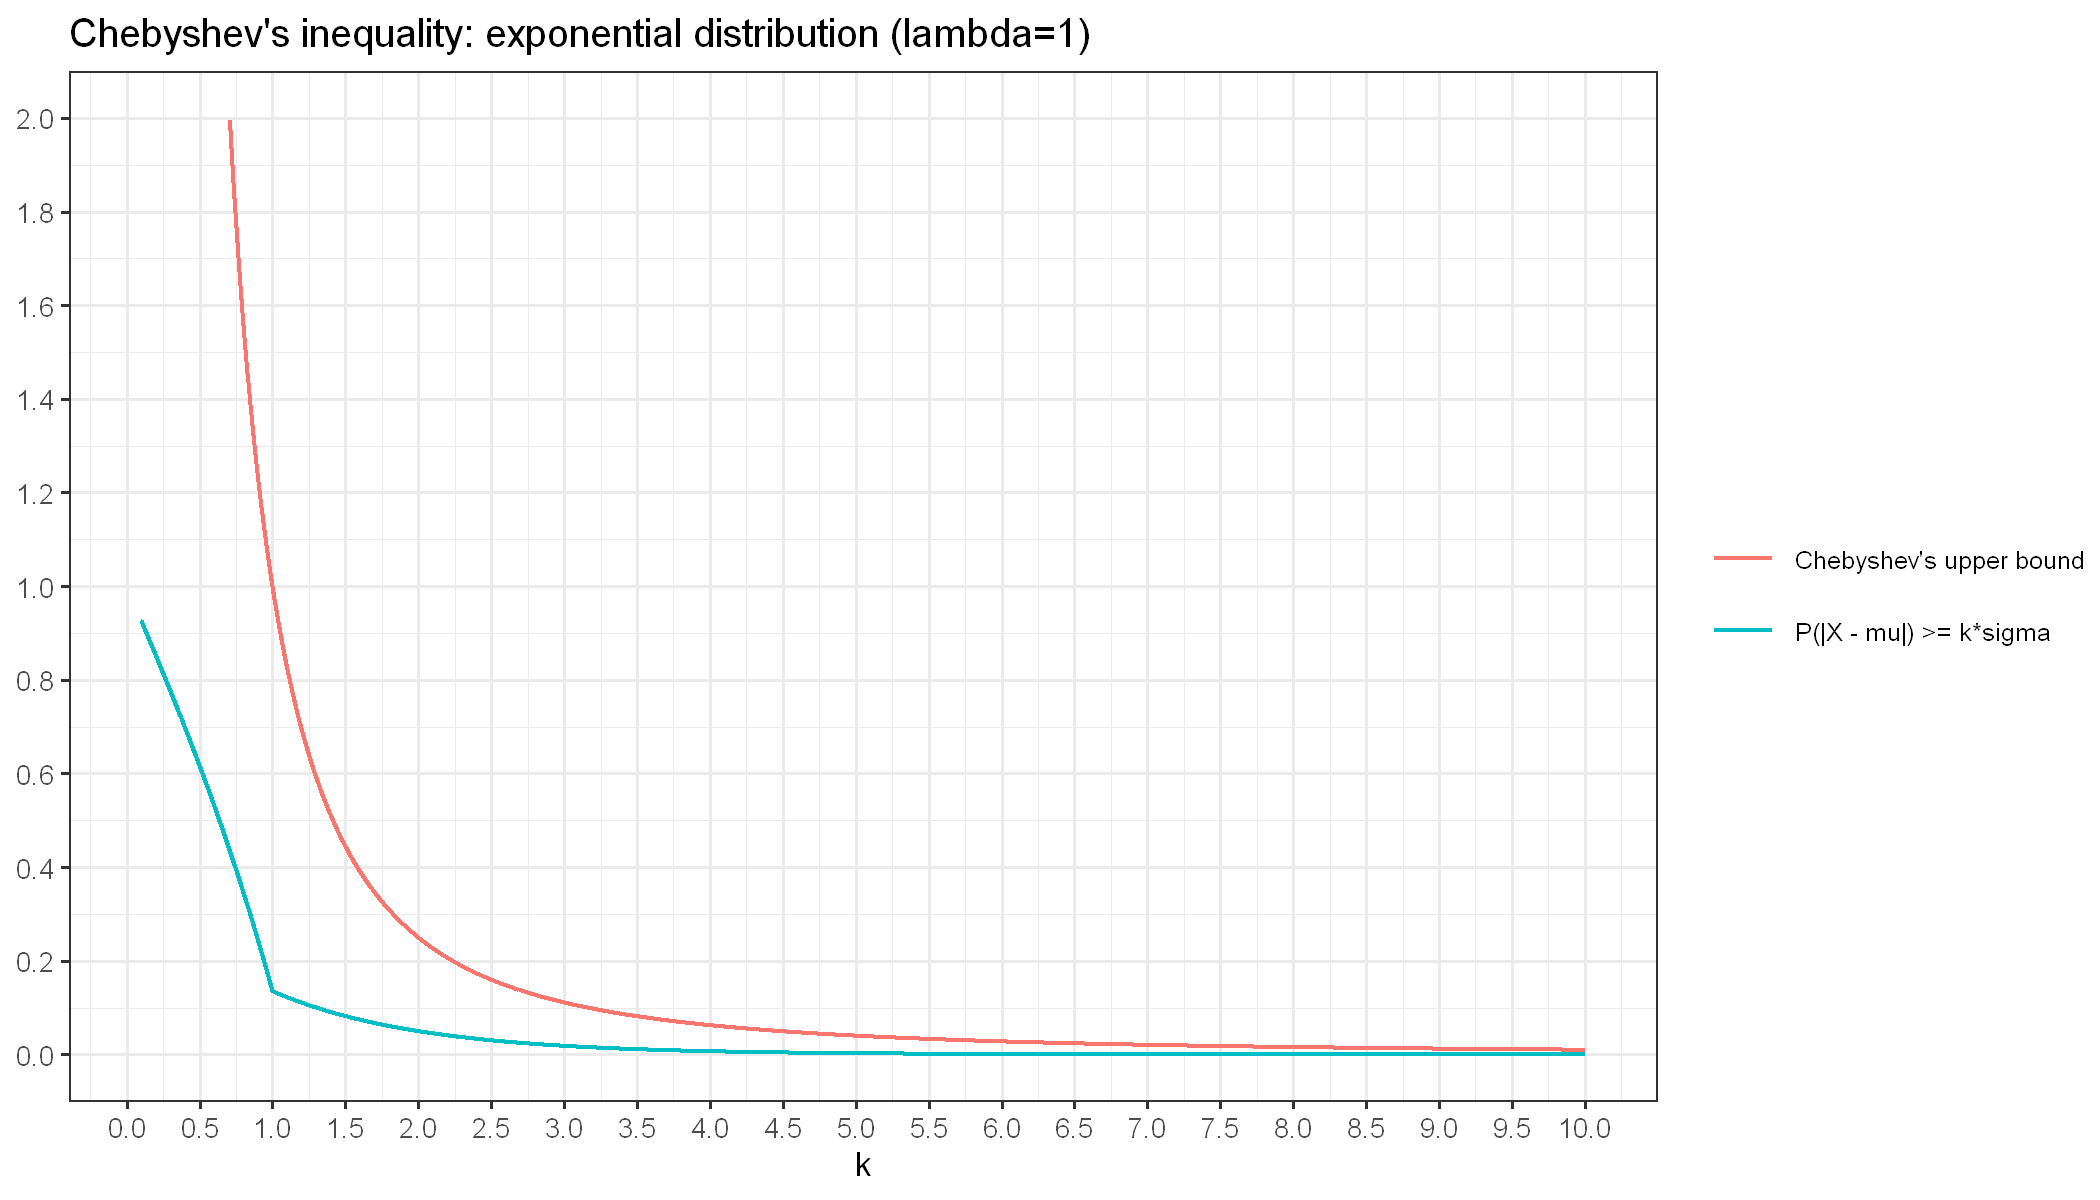

In [12]:
exp_lambda <- 1 # rate
exp_mean <- 1/exp_lambda # expected value
exp_stdev <- exp_mean # standard deviation

k <- seq(0.1, 10, length=10^4)
exp_title <- paste("Chebyshev's inequality: exponential distribution (lambda=", exp_lambda, ')', sep='')

plot_chebyshev(k=k, cdf=function(k) pexp(k, rate=exp_lambda), pdf_mean=exp_mean, pdf_stdev=exp_stdev, x_n.breaks=21, y_n.breaks=11, title=exp_title)

<a id='sec3.C'></a>
### **3.C** Uniform, $\mathcal{U}(1 - \sqrt{2}, 1 + \sqrt{2})$

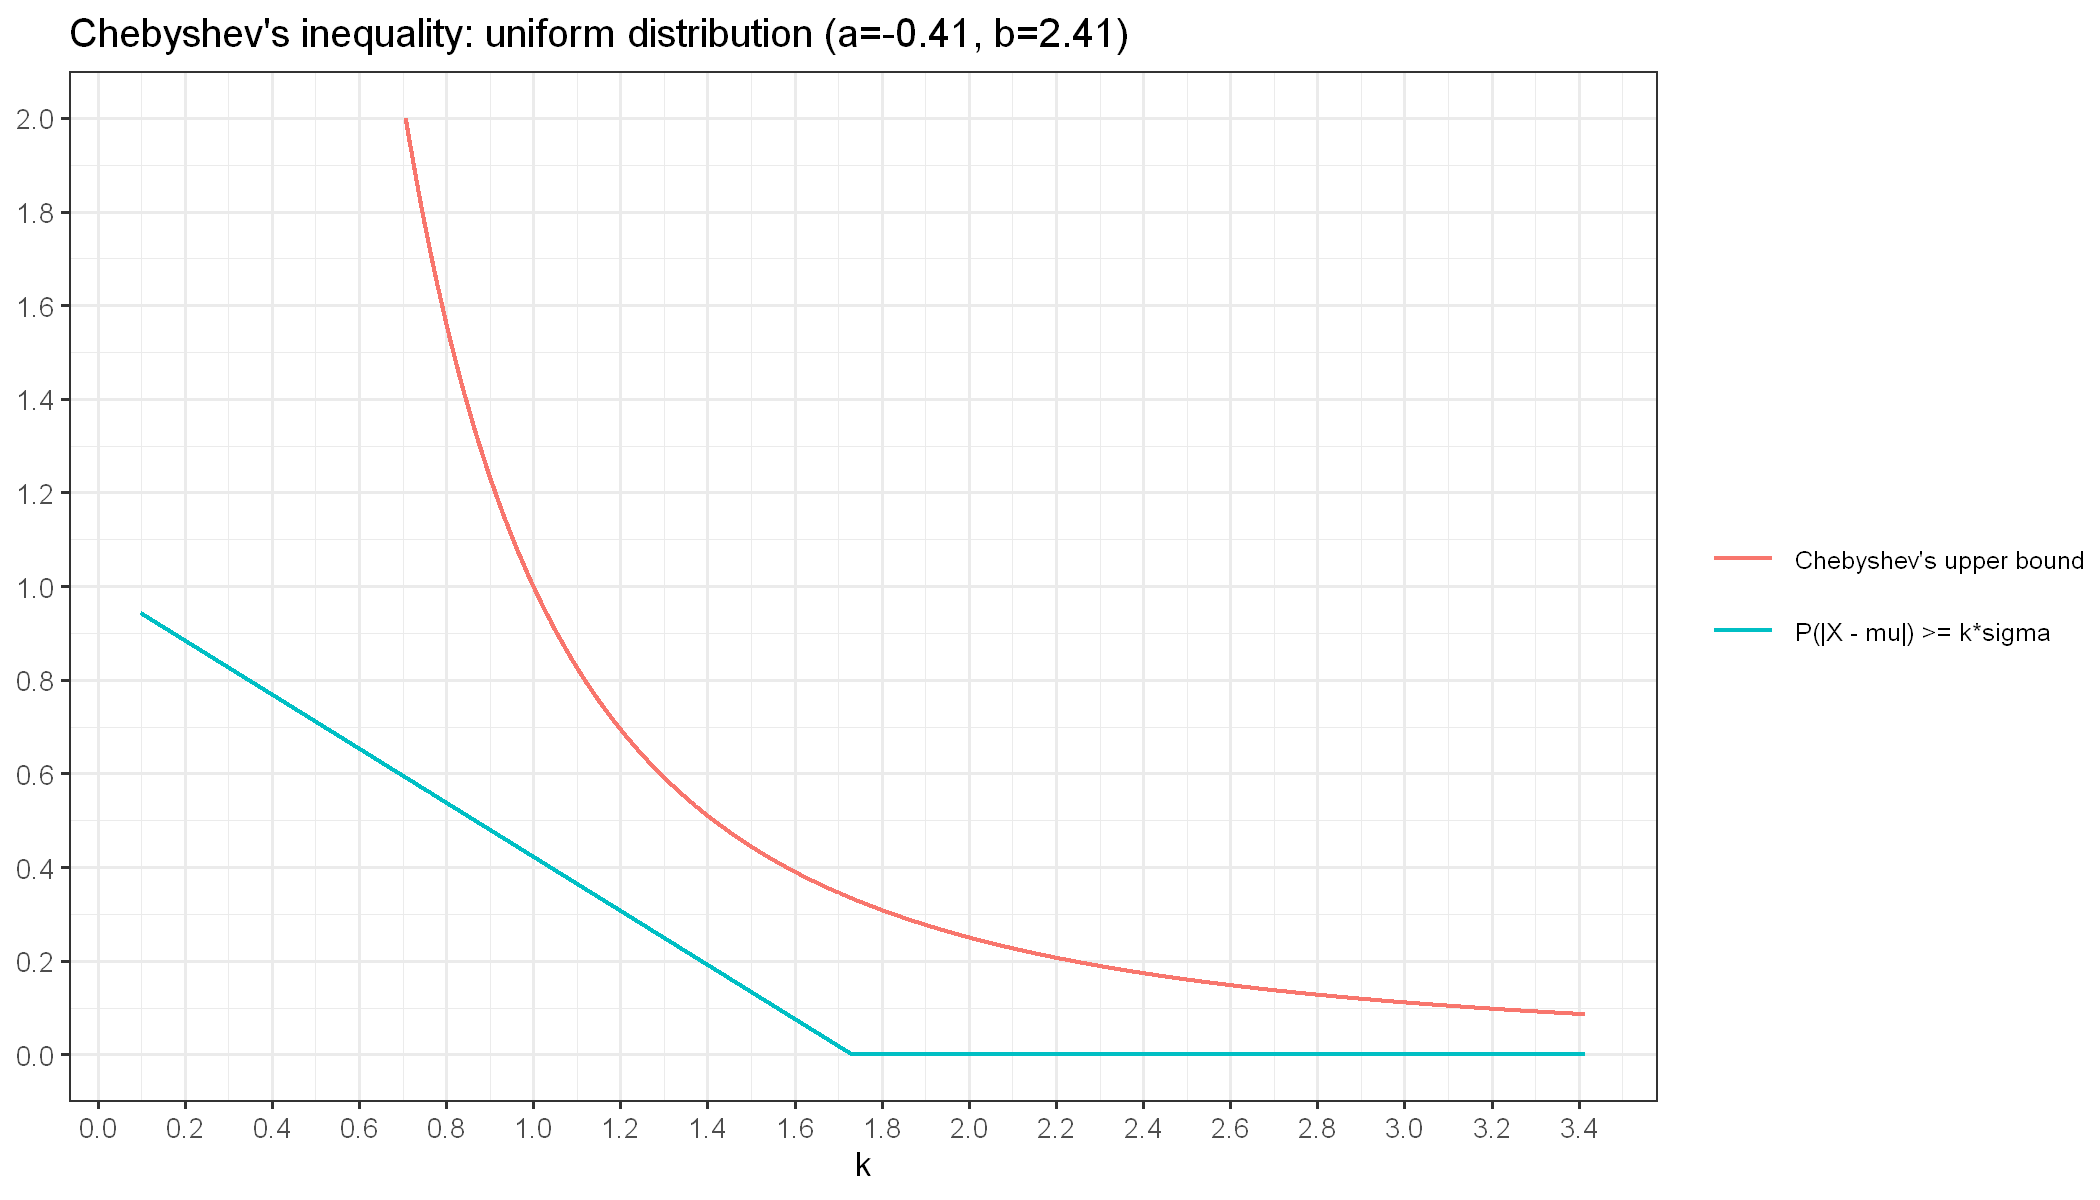

In [13]:
unif_a <- 1-sqrt(2) # lower limit
unif_b <- 1+sqrt(2) # upper limit
unif_mean <- (unif_a+unif_b)/2 # expected value
unif_stdev <- (unif_b-unif_a)/sqrt(12) # standard deviation

k <- seq(0.1, unif_b+1, length=10^4)
unif_title <- paste("Chebyshev's inequality: uniform distribution (a=", round(unif_a, 2), ", b=", round(unif_b, 2), ')', sep='')

plot_chebyshev(k=k, cdf=function(k) punif(k, min=unif_a, max=unif_b), pdf_mean=unif_mean, pdf_stdev=unif_stdev, x_n.breaks=18, y_n.breaks=11, title=unif_title)

<a id='sec3.D'></a>
### **3.D** Poisson, $Pois(\lambda = 1/3)$

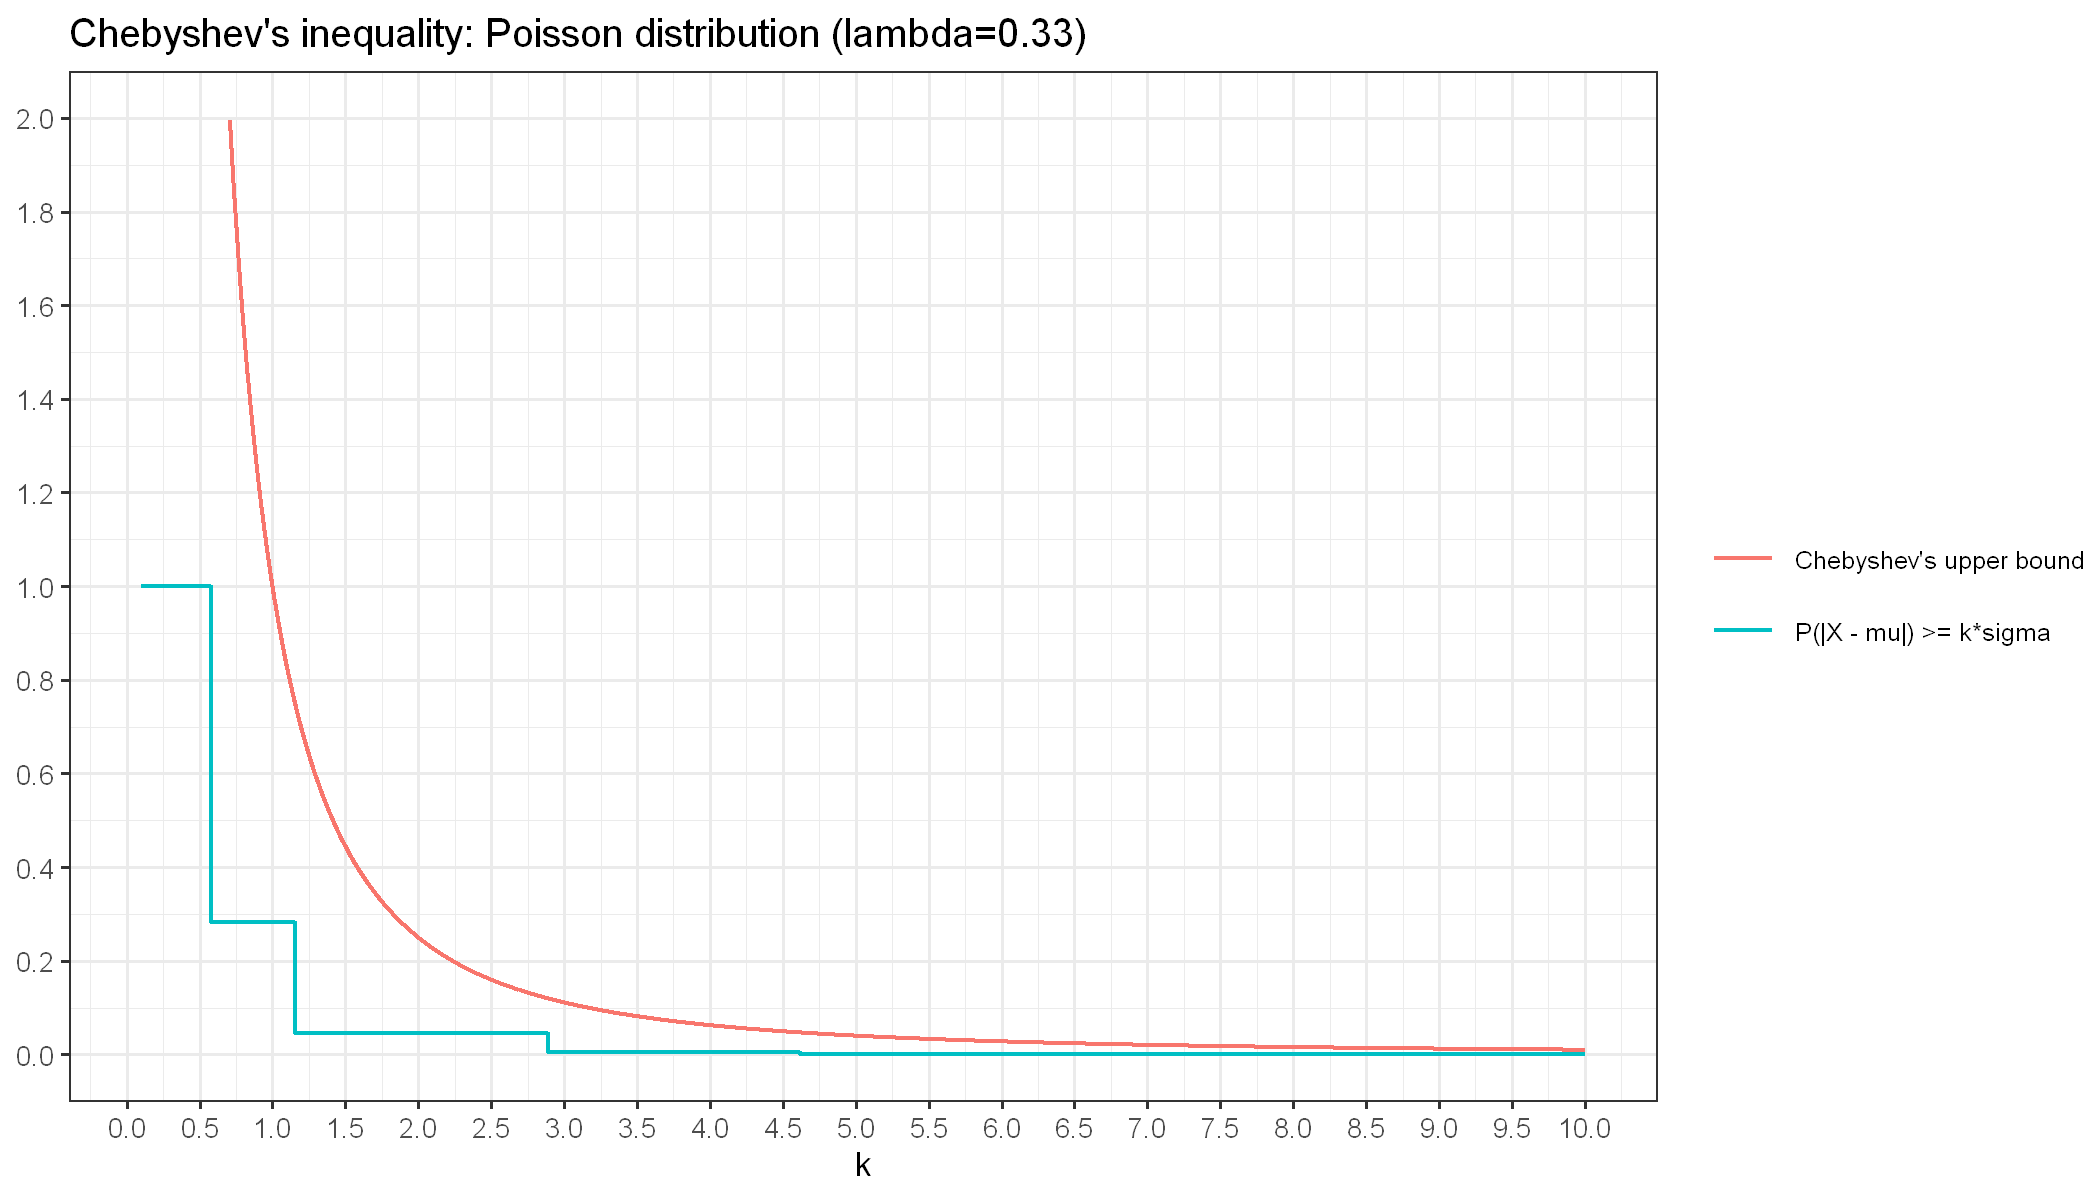

In [14]:
pois_lambda <- 1/3 # rate
pois_mean <- pois_lambda # expected value
pois_stdev <- sqrt(pois_lambda) # standard deviation

k <- seq(0.1, 10, length=10^4)
pois_title <- paste("Chebyshev's inequality: Poisson distribution (lambda=", round(pois_lambda, 2), ')', sep='')

plot_chebyshev(k=k, cdf=function(k) ppois(k, lambda=pois_lambda), pdf_mean=pois_mean, pdf_stdev=pois_stdev, x_n.breaks=21, y_n.breaks=11, title=pois_title)

<a id='sec4'></a>
## **Exercise 4** - Six Boxes Toy Model: Inference

The six boxes toy model is described in [[1]](#ref1) and [[2]](#ref2).

- ### Labeling the boxes with $H_i$, where the index $i = 0,1,2,3,4,5$ refers to the number of white balls, write a program in R that:

    #### 1) allows the user to insert the color of a randomly extracted box

    #### 2) prints on the standard output the probability of selecting each box

    #### 3) plots the probability for each box as a function of the extraction step

The developed program:

- allows the user to set the number of boxes **n_boxes**
- at each extraction saves the tibble containing the results to $\texttt{[n\_boxes]\_box\_toy\_inference.csv}$ and the corresponding plot to $\texttt{[n\_boxes]\_box\_toy\_inference.pdf}$

Here is the full code, saved to $\texttt{box\_toy\_inference.R}$ :

```r
# load tidyverse
suppressPackageStartupMessages(library(tidyverse))

# set ggplot theme
theme_set(theme_bw())

cat('\n######################')
cat('\n# BOX TOY: INFERENCE #')
cat('\n######################\n\n')

# set number of boxes as user input
suppressWarnings(n_boxes <- as.numeric(readline(prompt='Type the number of boxes (>= 3): ')))
while (is.na(n_boxes) | n_boxes != as.integer(n_boxes) | n_boxes < 3) {
  cat('Invalid input!\n\n')
  suppressWarnings(n_boxes <- as.numeric(readline(prompt='Type the number of boxes (>= 3): ')))
}
n_boxes <- as.integer(n_boxes)

# initialize tibble 'box_toy'
extraction <- 0L                      # number of extractions performed        
colour     <- '-'                     # colour of extracted ball as "B" or "W" ("black" or "white")
priors     <- rep(1/n_boxes, n_boxes) # prior probabilities
prob_black <- 0.5                     # probability of extracting black ball on next draw
prob_white <- 1-prob_black            # probability of extracting white ball on next draw

box_toy <- tibble(
                Extraction = rep(extraction, n_boxes),
                Colour     = rep(colour, n_boxes),
                box_label  = str_glue('P(H_{seq(0, n_boxes-1)})'),
                box_prob   = priors,
                'P(E_b)'   = rep(prob_black, n_boxes),
                'P(E_w)'   = rep(prob_white, n_boxes))

# print tibble 'box_toy'
cat('\n')
print(box_toy %>% pivot_wider(names_from=box_label, values_from=box_prob), width=Inf, n=Inf)
cat('\n')

# load colour of 1st extracted ball as user input
colour <- toupper(readline(prompt=str_glue('[Extraction #{extraction+1}] Type the colour of the extracted ball as "B" or "W" ("black" or "white"), otherwise, type "Q" to quit this program: ')))
while (!(colour %in% c('B', 'W', 'Q'))) {
  cat('Invalid input!\n\n')
  colour <- toupper(readline(prompt=str_glue('[Extraction #{extraction+1}] Type the colour of the extracted ball as "B" or "W" ("black" or "white"), otherwise, type "Q" to quit this program: ')))
}

while (colour != 'Q') {
  
  extraction <- extraction+1L
  
  if (colour == 'B') {
    likelihoods <- 1-seq(0, n_boxes-1)/(n_boxes-1)            # likelihoods
    posteriors  <- likelihoods*priors/sum(likelihoods*priors) # posterior probabilities
    prob_black  <- sum(likelihoods*posteriors)
    prob_white  <- 1-prob_black
  } else {
    likelihoods <- seq(0, n_boxes-1)/(n_boxes-1)              # likelihoods
    posteriors  <- likelihoods*priors/sum(likelihoods*priors) # posterior probabilities
    prob_white  <- sum(likelihoods*posteriors)
    prob_black  <- 1-prob_white
  }
  
  # update tibble 'box_toy'
  box_toy <- box_toy %>% add_row(
                                Extraction = rep(extraction, n_boxes),
                                Colour     = rep(colour, n_boxes),
                                box_label  = str_glue('P(H_{seq(0, n_boxes-1)})'),
                                box_prob   = posteriors,
                                'P(E_b)'   = rep(prob_black, n_boxes),
                                'P(E_w)'   = rep(prob_white, n_boxes))
  
  # print tibble 'box_toy'
  cat('\n')
  print(box_toy %>% pivot_wider(names_from=box_label, values_from=box_prob), width=Inf, n=Inf)
  cat('\n')

  # save tibble 'box_toy' to .csv file
  write_csv(box_toy, str_glue('{n_boxes}_box_toy_inference.csv'))

  # plot probabilities
  p <- ggplot(data=box_toy, aes(x=Extraction, y=box_prob)) +
        geom_line(alpha=.5, colour='red', size=.5) +
        geom_point(colour='black', size=1) +
        scale_x_continuous(breaks=seq(0, extraction, by=ceiling(extraction/10))) +
        scale_y_continuous(n.breaks=6, limits=c(0, 1)) +
        xlab('Extraction #') +
        ylab('Probability') +
        facet_wrap(vars(box_label), ncol=3, labeller=label_bquote(P(H[.(str_sub(box_label, start=5, end=-2))]))) +
        theme(strip.background = element_rect(fill="aliceblue"),
              strip.text       = element_text(size=14, margin=margin(t=.5, b=.5)))
  print(p)
  
  # save plot to .pdf file
  ggsave(str_glue('{n_boxes}_box_toy_inference.pdf'), width=12.5, height=3.5*ceiling(n_boxes/3))
  
  # update prior probabilities for next draw
  priors <- posteriors
  
  # load colour of next extracted ball as user input
  colour <- toupper(readline(prompt=str_glue('[Extraction #{extraction+1}] Type the colour of the extracted ball as "B" or "W" ("black" or "white"), otherwise, type "Q" to quit this program: ')))
  while (!(colour %in% c('B', 'W', 'Q'))) {
    cat('Invalid input!\n\n')
    colour <- toupper(readline(prompt=str_glue('[Extraction #{extraction+1}] Type the colour of the extracted ball as "B" or "W" ("black" or "white"), otherwise, type "Q" to quit this program: ')))
  }
  
}
```

Let's define the function *load_box_toy* which loads the results of both $\texttt{box\_toy\_inference.R}$ and $\texttt{box\_toy\_simulation.R}$ :

In [15]:
load_box_toy <- function(n_boxes=6, type='inference', n_extractions=20) {

                  # load tibble 'box_toy' from .csv file
                  if (type == 'inference') {
                        box_toy <- read_csv(str_glue('{n_boxes}_box_toy_inference.csv'), show_col_types=F)
                  } else {
                        box_toy <- read_csv(str_glue('{n_boxes}_box_toy_simulation_{n_extractions}_extractions.csv'), show_col_types=F)
                  }
                  box_toy$Extraction <- as.integer(box_toy$Extraction)

                  # plot probabilities
                  extraction <- last(box_toy$Extraction) # number of extractions performed
                  p <- ggplot(data=box_toy, aes(x=Extraction, y=box_prob)) +
                        geom_line(alpha=.5, colour='red', size=.5) +
                        geom_point(colour='black', size=1) +
                        scale_x_continuous(breaks=seq(0, extraction, by=ceiling(extraction/10))) +
                        scale_y_continuous(n.breaks=6, limits=c(0, 1)) +
                        xlab('Extraction #') +
                        ylab('Probability') +
                        facet_wrap(vars(box_label), ncol=3, labeller=label_bquote(P(H[.(str_sub(box_label, start=5, end=-2))]))) +
                        theme(strip.background = element_rect(fill="aliceblue"),
                              strip.text       = element_text(size=8, margin=margin(t=.5, b=.5)))
                  print(p)

                  # print tibble 'box_toy'
                  box_toy %>% pivot_wider(names_from=box_label, values_from=box_prob)

                  }          

Let's load the results of $\texttt{box\_toy\_inference.R}$ :

- **n_boxes** $= 6$

Extraction,Colour,P(E_b),P(E_w),P(H_0),P(H_1),P(H_2),P(H_3),P(H_4),P(H_5)
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,-,0.5000000,0.50000000,0.1666667,0.16666667,0.166666667,1.666667e-01,1.666667e-01,0.1666667
1,B,0.7333333,0.26666667,0.3333333,0.26666667,0.200000000,1.333333e-01,6.666667e-02,0.0000000
2,B,0.8181818,0.18181818,0.4545455,0.29090909,0.163636364,7.272727e-02,1.818182e-02,0.0000000
3,B,0.8702222,0.12977778,0.5555556,0.28444444,0.120000000,3.555556e-02,4.444444e-03,0.0000000
4,B,0.9039837,0.09601634,0.6384065,0.26149132,0.082737487,1.634321e-02,1.021450e-03,0.0000000
5,B,0.9272316,0.07276836,0.7062147,0.23141243,0.054915254,7.231638e-03,2.259887e-04,0.0000000
6,B,0.9439435,0.05605654,0.7616378,0.19965879,0.035534974,3.119669e-03,4.874482e-05,0.0000000
7,B,0.9563212,0.04367880,0.8068681,0.16921250,0.022587142,1.321973e-03,1.032791e-05,0.0000000
8,B,0.9656874,0.03431257,0.8437208,0.14155286,0.014171269,5.529408e-04,2.159925e-06,0.0000000


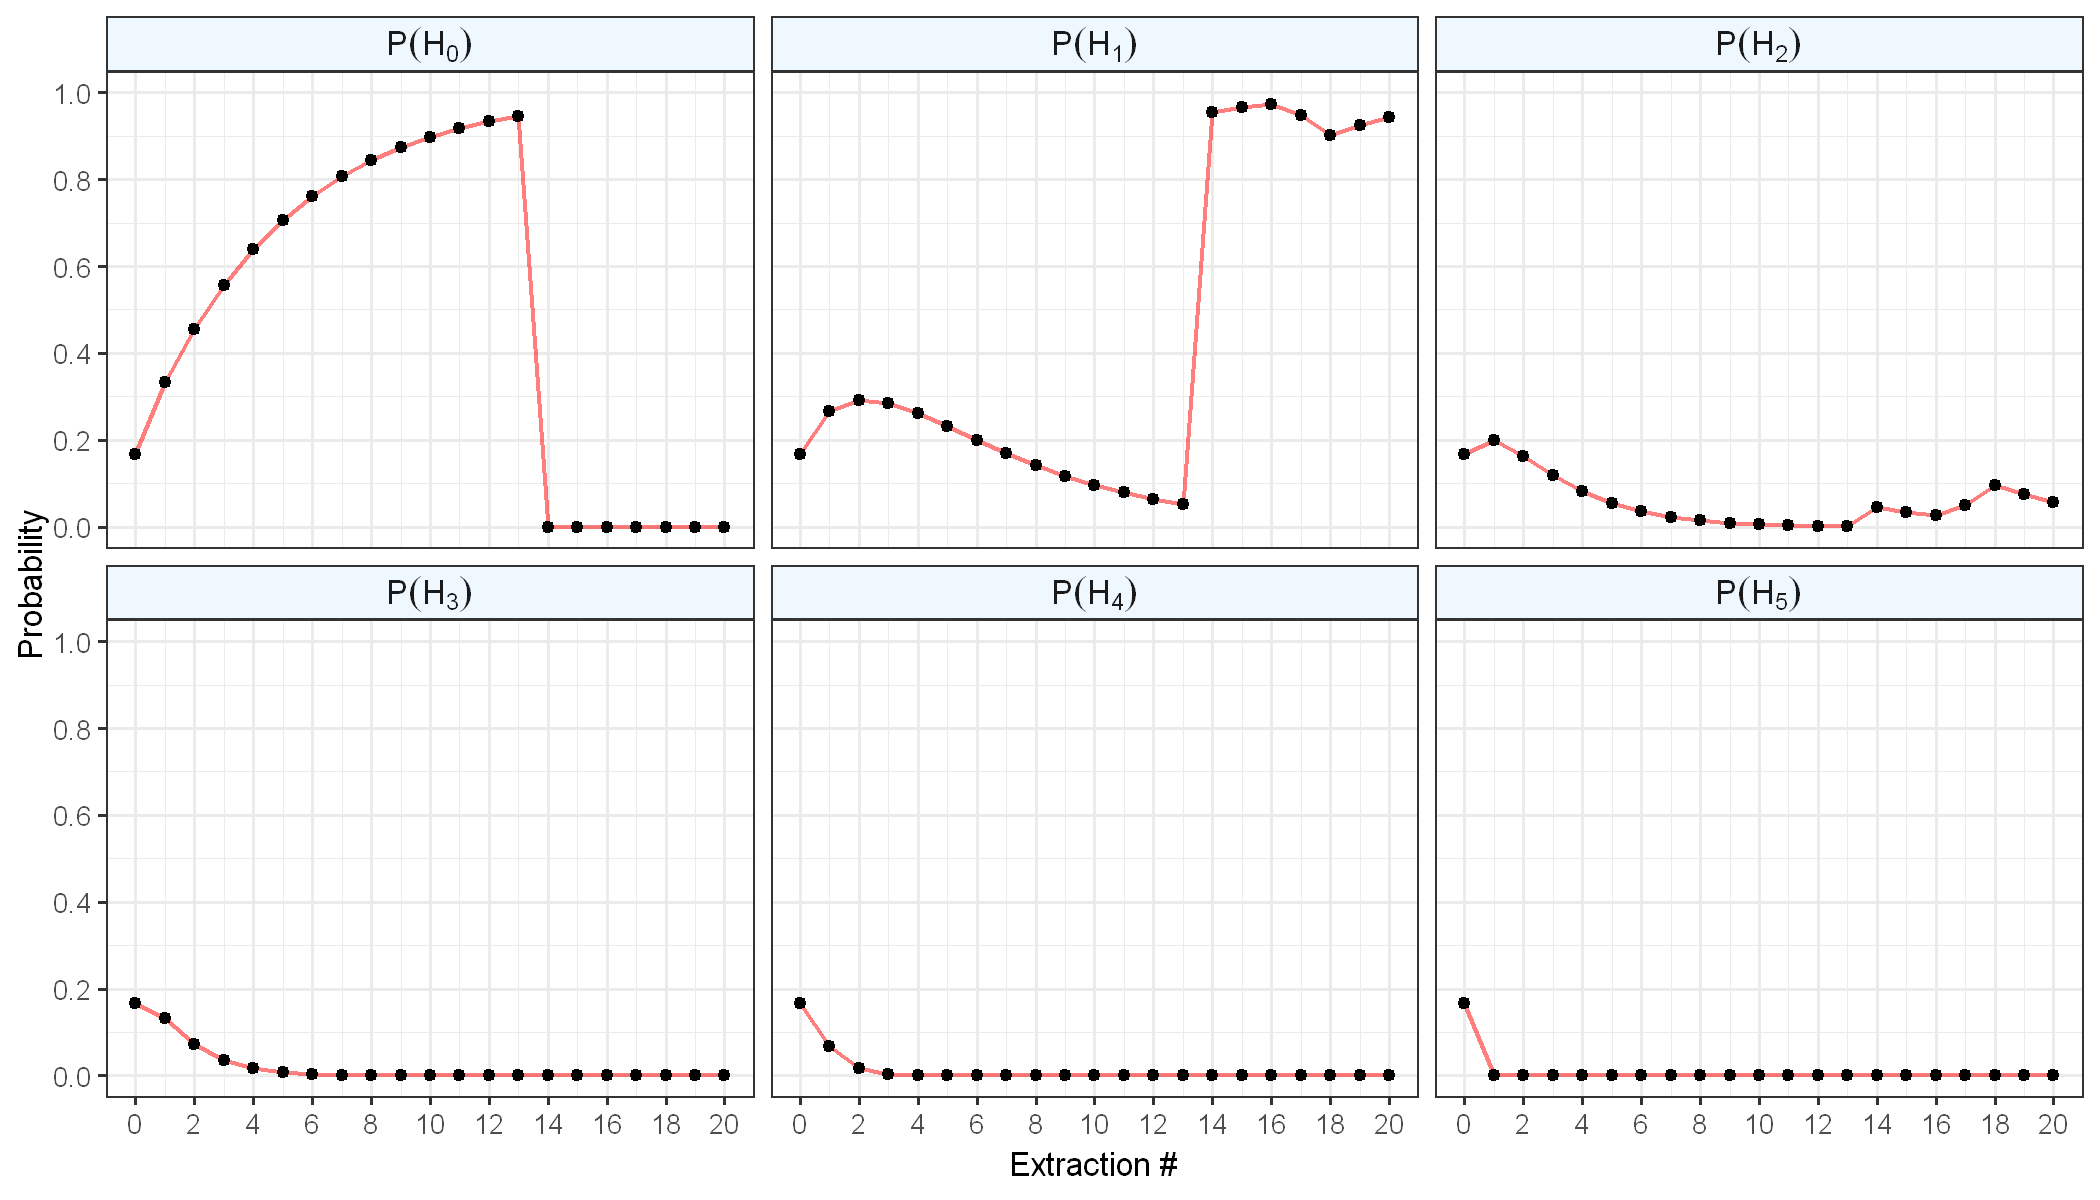

In [16]:
load_box_toy(n_boxes=6, type='inference')

- **n_boxes** $= 9$

Extraction,Colour,P(E_b),P(E_w),P(H_0),P(H_1),P(H_2),P(H_3),P(H_4),P(H_5),P(H_6),P(H_7),P(H_8)
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,-,0.5000000,0.5000000,0.1111111,1.111111e-01,1.111111e-01,0.11111111,0.1111111,0.1111111,0.11111111,0.1111111111,0.1111111
1,W,0.2916667,0.7083333,0.0000000,2.777778e-02,5.555556e-02,0.08333333,0.1111111,0.1388889,0.16666667,0.1944444444,0.2222222
2,B,0.5000000,0.5000000,0.0000000,8.333333e-02,1.428571e-01,0.17857143,0.1904762,0.1785714,0.14285714,0.0833333333,0.0000000
3,W,0.4062500,0.5937500,0.0000000,2.083333e-02,7.142857e-02,0.13392857,0.1904762,0.2232143,0.21428571,0.1458333333,0.0000000
4,B,0.5000000,0.5000000,0.0000000,4.487179e-02,1.318681e-01,0.20604396,0.2344322,0.2060440,0.13186813,0.0448717949,0.0000000
5,W,0.4289148,0.5710852,0.0000000,1.121795e-02,6.593407e-02,0.15453297,0.2344322,0.2575549,0.19780220,0.0785256410,0.0000000
6,W,0.3755262,0.6244738,0.0000000,2.455402e-03,2.886350e-02,0.10147324,0.2052516,0.2818701,0.25977150,0.1203146923,0.0000000
7,W,0.3342110,0.6657890,0.0000000,4.914941e-04,1.155513e-02,0.06093524,0.1643396,0.2821076,0.31198844,0.1685824908,0.0000000
8,W,0.3013604,0.6986396,0.0000000,9.227663e-05,4.338885e-03,0.03432126,0.1234172,0.2648245,0.35144968,0.2215561984,0.0000000


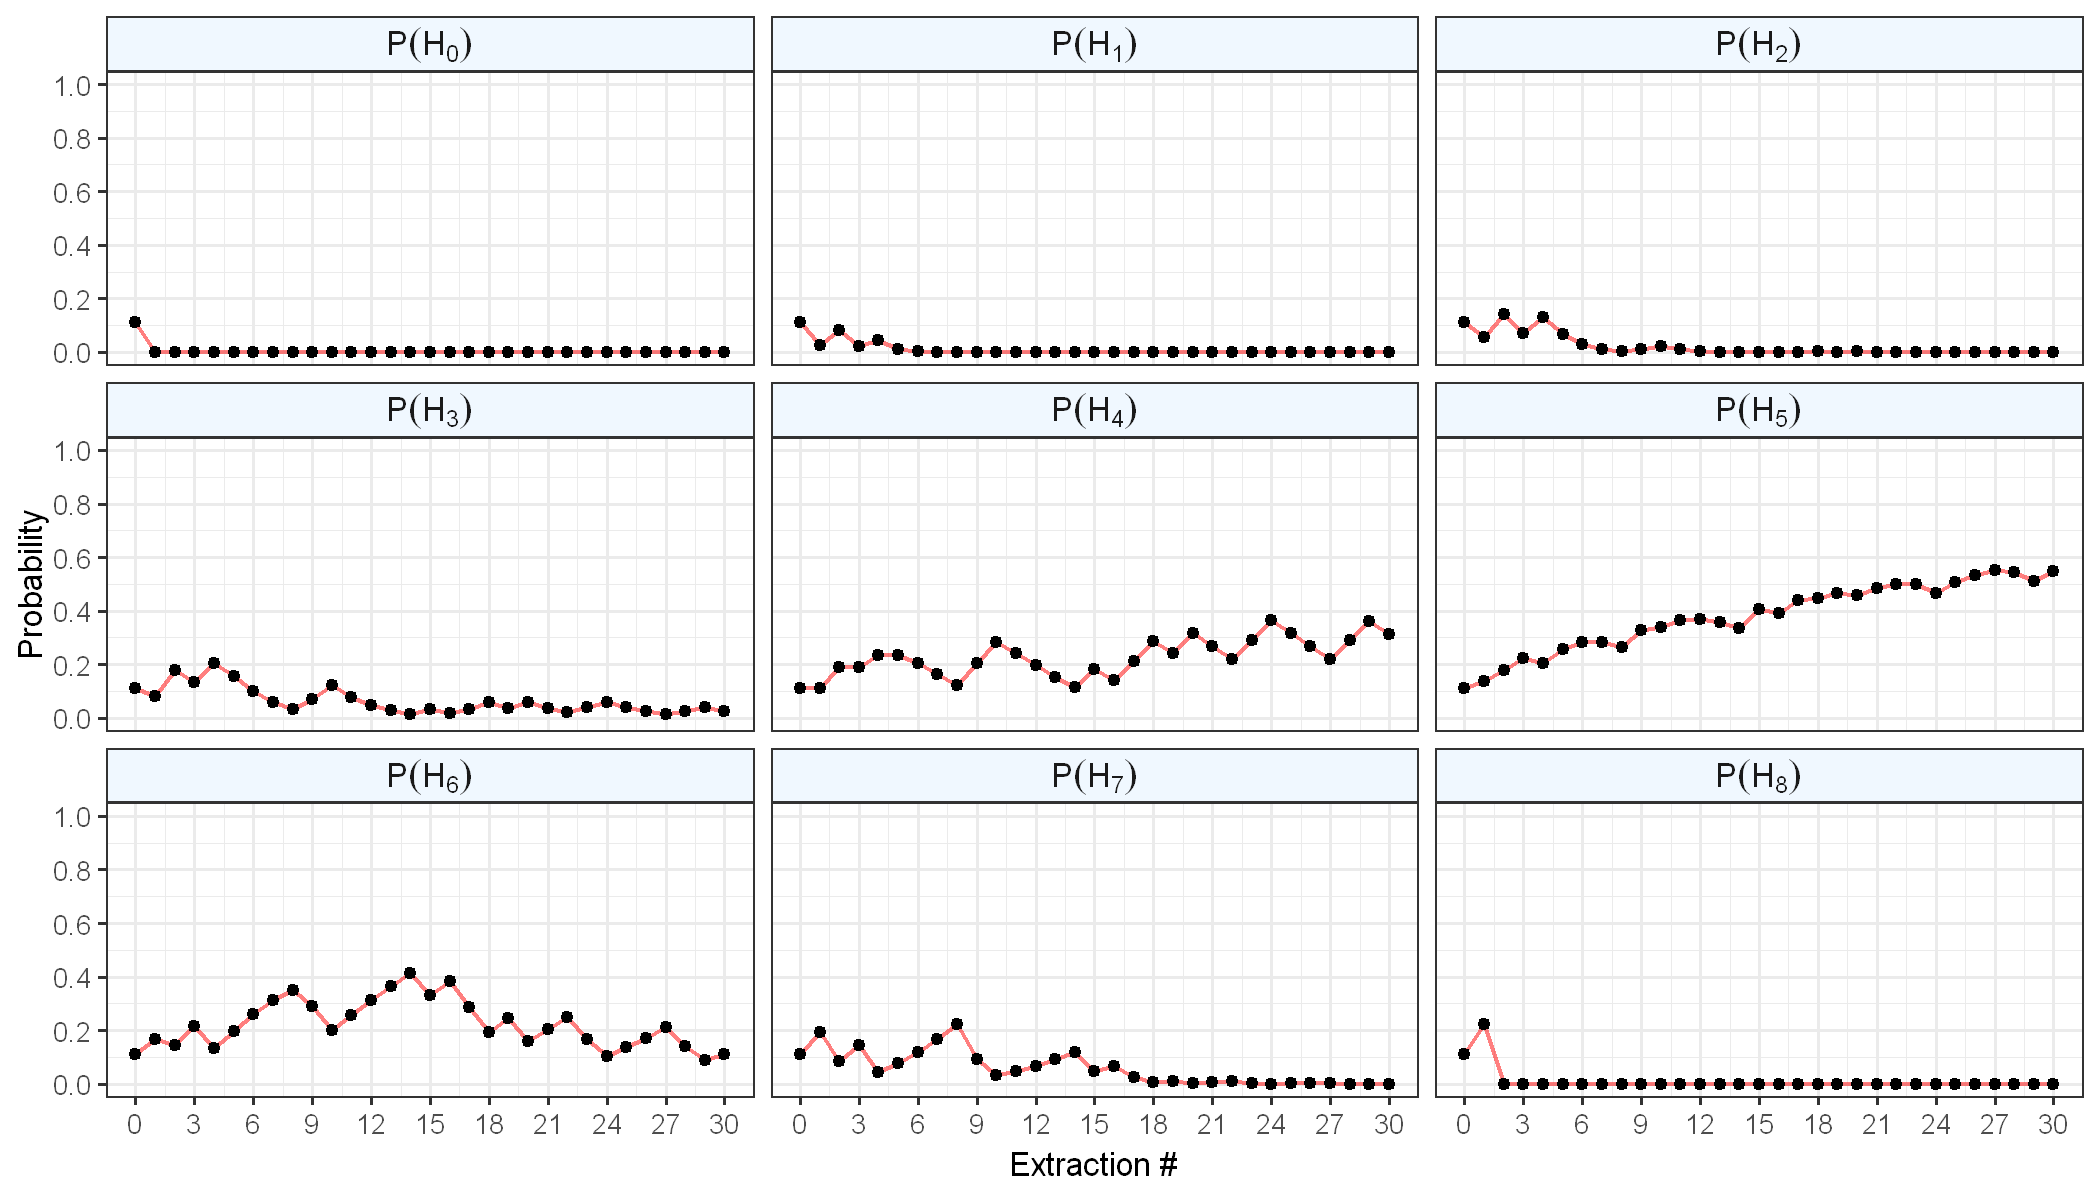

In [17]:
load_box_toy(n_boxes=9, type='inference')

<a id='sec5'></a>
## **Exercise 5** - Six Boxes Toy Model: Simulation

- ### Consider again the six boxes toy model of the previous exercise and write a simulation program that:

    #### 1) selects a random box

    #### 2) makes random sampling from the box

    #### 3) prints on the standard output the probability of selecting each box

    #### 4) plots the probability for each box as a function of the number of trials

The developed program:

- allows the user to set the random seed **random_seed**, the number of boxes **n_boxes** and the number of extractions to be performed **n_extractions**
- saves the tibble containing the results to $\texttt{[n\_boxes]\_box\_toy\_simulation\_[n\_extractions]\_extractions.csv}$ and the corresponding plot to $\texttt{[n\_boxes]\_box\_toy\_simulation\_[n\_extractions]\_extractions.pdf}$

Here is the full code, saved to $\texttt{box\_toy\_simulation.R}$ :

```r
# load tidyverse
suppressPackageStartupMessages(library(tidyverse))

# set ggplot theme
theme_set(theme_bw())

cat('\n#######################')
cat('\n# BOX TOY: SIMULATION #')
cat('\n#######################\n\n')

# set random seed as user input
suppressWarnings(random_seed <- as.numeric(readline(prompt='Type the random seed as numeric, otherwise, type any character to skip this step: ')))
if (is.na(random_seed)) {
  cat('The random seed has NOT been set!\n\n')
} else {
  set.seed(random_seed)
  cat('The random seed has been set to', random_seed, '!\n\n')
}

# set number of boxes as user input
suppressWarnings(n_boxes <- as.numeric(readline(prompt='Type the number of boxes (>= 3): ')))
while (is.na(n_boxes) | n_boxes != as.integer(n_boxes) | n_boxes < 3) {
  cat('Invalid input!\n\n')
  suppressWarnings(n_boxes <- as.numeric(readline(prompt='Type the number of boxes (>= 3): ')))
}
n_boxes <- as.integer(n_boxes)

# initialize tibble 'box_toy'
extraction <- 0L                      # number of extractions performed        
colour     <- '-'                     # colour of extracted ball as "B" or "W" ("black" or "white")
priors     <- rep(1/n_boxes, n_boxes) # prior probabilities
prob_black <- 0.5                     # probability of extracting black ball on next draw
prob_white <- 1-prob_black            # probability of extracting white ball on next draw

box_toy <- tibble(
                Extraction = rep(extraction, n_boxes),
                Colour     = rep(colour, n_boxes),
                box_label  = str_glue('P(H_{seq(0, n_boxes-1)})'),
                box_prob   = priors,
                'P(E_b)'   = rep(prob_black, n_boxes),
                'P(E_w)'   = rep(prob_white, n_boxes))

# print tibble 'box_toy'
cat('\n')
print(box_toy %>% pivot_wider(names_from=box_label, values_from=box_prob), width=Inf, n=Inf)
cat('\n')

# select a box at random
cat('\nSelecting a box at random... ')
n_black <- rdunif(n=1, a=0, b=n_boxes-1)           # number of black balls in the box
n_white <- (n_boxes-1)-n_black                     # number of white balls in the box
box     <- c(rep('B', n_black), rep('W', n_white)) # box selected at random
cat('DONE!\n\n')

# set number of extractions to be performed as user input
suppressWarnings(n_extractions <- as.numeric(readline(prompt='Type the number of extractions to be performed (>= 1): ')))
while (is.na(n_extractions) | n_extractions != as.integer(n_extractions) | n_extractions < 1) {
  cat('Invalid input!\n\n')
  suppressWarnings(n_extractions <- as.numeric(readline(prompt='Type the number of extractions to be performed (>= 1): ')))
}
n_extractions <- as.integer(n_extractions)

for (extraction in 1:n_extractions) {

  # draw a ball at random from selected box
  colour <- box[rdunif(n=1, a=1, b=n_boxes-1)]

  if (colour == 'B') {
    likelihoods <- 1-seq(0, n_boxes-1)/(n_boxes-1)            # likelihoods
    posteriors  <- likelihoods*priors/sum(likelihoods*priors) # posterior probabilities
    prob_black  <- sum(likelihoods*posteriors)
    prob_white  <- 1-prob_black
  } else {
    likelihoods <- seq(0, n_boxes-1)/(n_boxes-1)              # likelihoods
    posteriors  <- likelihoods*priors/sum(likelihoods*priors) # posterior probabilities
    prob_white  <- sum(likelihoods*posteriors)
    prob_black  <- 1-prob_white
  }
  
  # update tibble 'box_toy'
  box_toy <- box_toy %>% add_row(
                                Extraction = rep(extraction, n_boxes),
                                Colour     = rep(colour, n_boxes),
                                box_label  = str_glue('P(H_{seq(0, n_boxes-1)})'),
                                box_prob   = posteriors,
                                'P(E_b)'   = rep(prob_black, n_boxes),
                                'P(E_w)'   = rep(prob_white, n_boxes))

  # update prior probabilities for next draw
  priors <- posteriors

}
  
# print tibble 'box_toy'
cat('\n')
print(box_toy %>% pivot_wider(names_from=box_label, values_from=box_prob), width=Inf, n=Inf)
cat('\n')

# save tibble 'box_toy' to .csv file
write_csv(box_toy, str_glue('{n_boxes}_box_toy_simulation_{n_extractions}_extractions.csv'))

# plot probabilities
p <- ggplot(data=box_toy, aes(x=Extraction, y=box_prob)) +
      geom_line(alpha=.5, colour='red', size=.5) +
      geom_point(colour='black', size=1) +
      scale_x_continuous(breaks=seq(0, extraction, by=ceiling(extraction/10))) +
      scale_y_continuous(n.breaks=6, limits=c(0, 1)) +
      xlab('Extraction #') +
      ylab('Probability') +
      facet_wrap(vars(box_label), ncol=3, labeller=label_bquote(P(H[.(str_sub(box_label, start=5, end=-2))]))) +
      theme(strip.background = element_rect(fill="aliceblue"),
            strip.text       = element_text(size=14, margin=margin(t=.5, b=.5)))
print(p)

# save plot to .pdf file
ggsave(str_glue('{n_boxes}_box_toy_simulation_{n_extractions}_extractions.pdf'), width=12.5, height=3.5*ceiling(n_boxes/3))
```

Let's load the results of $\texttt{box\_toy\_simulation.R}$ :

- **random_seed** $= 6,$ **n_boxes** $= 6,$ **n_extractions** $= 20$

Extraction,Colour,P(E_b),P(E_w),P(H_0),P(H_1),P(H_2),P(H_3),P(H_4),P(H_5)
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,-,0.5000000,0.5000000,0.1666667,0.1666667,0.16666667,1.666667e-01,1.666667e-01,0.1666667
1,B,0.7333333,0.2666667,0.3333333,0.2666667,0.20000000,1.333333e-01,6.666667e-02,0.0000000
2,W,0.5000000,0.5000000,0.0000000,0.2000000,0.30000000,3.000000e-01,2.000000e-01,0.0000000
3,B,0.5840000,0.4160000,0.0000000,0.3200000,0.36000000,2.400000e-01,8.000000e-02,0.0000000
4,B,0.6438356,0.3561644,0.0000000,0.4383562,0.36986301,1.643836e-01,2.739726e-02,0.0000000
5,B,0.6851064,0.3148936,0.0000000,0.5446809,0.34468085,1.021277e-01,8.510638e-03,0.0000000
6,B,0.7142857,0.2857143,0.0000000,0.6360248,0.30186335,5.962733e-02,2.484472e-03,0.0000000
7,B,0.7355130,0.2644870,0.0000000,0.7123478,0.25356522,3.339130e-02,6.956522e-04,0.0000000
8,B,0.7512532,0.2487468,0.0000000,0.7748037,0.20684763,1.815946e-02,1.891611e-04,0.0000000


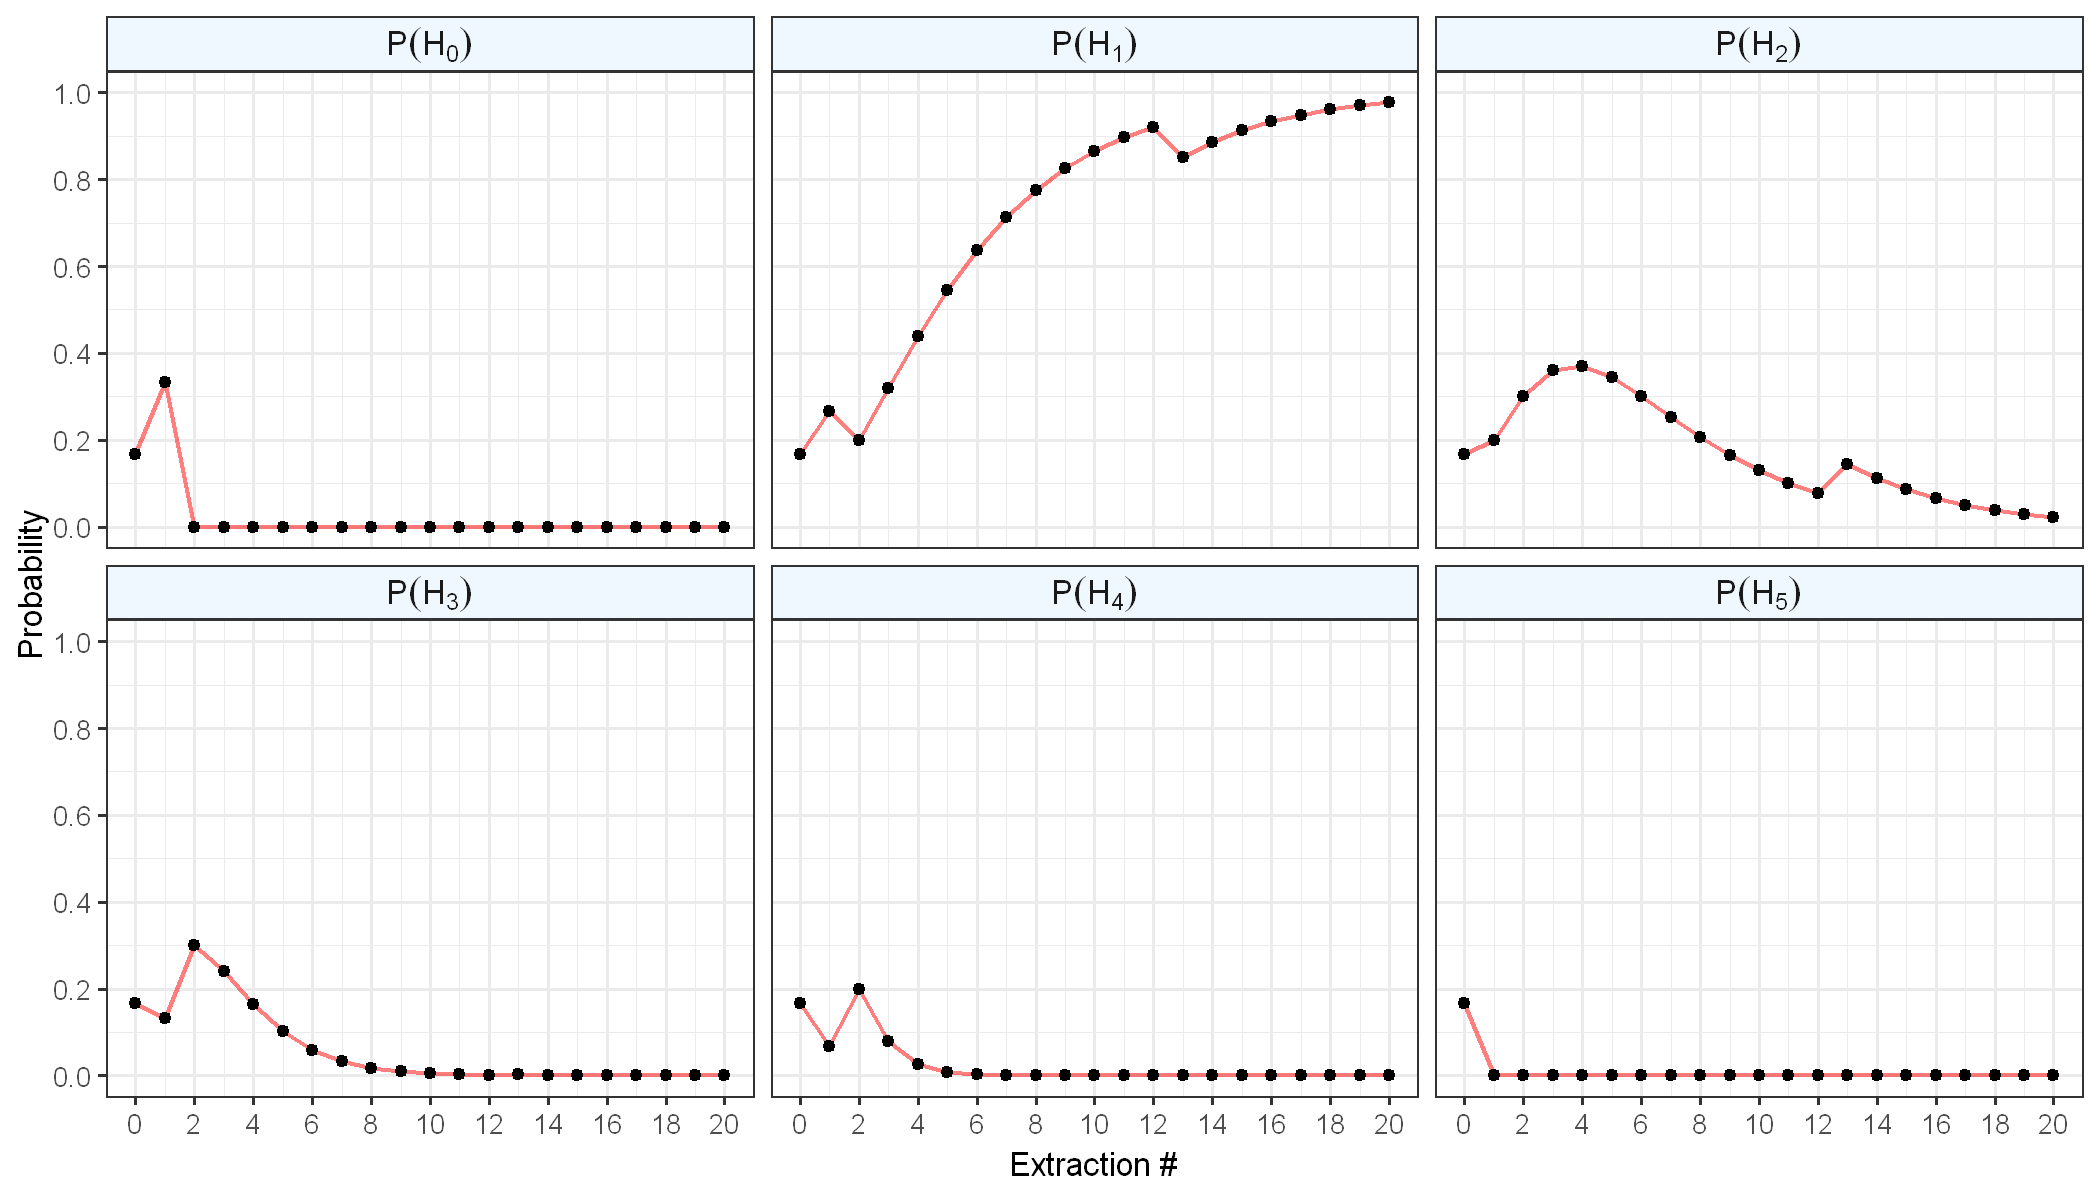

In [18]:
load_box_toy(n_boxes=6, type='simulation', n_extractions=20)

- **random_seed** $= 9,$ **n_boxes** $= 9,$ **n_extractions** $= 60$

Extraction,Colour,P(E_b),P(E_w),P(H_0),P(H_1),P(H_2),P(H_3),P(H_4),P(H_5),P(H_6),P(H_7),P(H_8)
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,-,0.5000000,0.5000000,0.1111111,0.1111111111,0.11111111,0.11111111,0.1111111,0.11111111,0.1111111111,1.111111e-01,0.1111111
1,W,0.2916667,0.7083333,0.0000000,0.0277777778,0.05555556,0.08333333,0.1111111,0.13888889,0.1666666667,1.944444e-01,0.2222222
2,B,0.5000000,0.5000000,0.0000000,0.0833333333,0.14285714,0.17857143,0.1904762,0.17857143,0.1428571429,8.333333e-02,0.0000000
3,W,0.4062500,0.5937500,0.0000000,0.0208333333,0.07142857,0.13392857,0.1904762,0.22321429,0.2142857143,1.458333e-01,0.0000000
4,B,0.5000000,0.5000000,0.0000000,0.0448717949,0.13186813,0.20604396,0.2344322,0.20604396,0.1318681319,4.487179e-02,0.0000000
5,B,0.5710852,0.4289148,0.0000000,0.0785256410,0.19780220,0.25755495,0.2344322,0.15453297,0.0659340659,1.121795e-02,0.0000000
6,B,0.6244738,0.3755262,0.0000000,0.1203146923,0.25977150,0.28187011,0.2052516,0.10147324,0.0288634997,2.455402e-03,0.0000000
7,W,0.5557696,0.4442304,0.0000000,0.0400487056,0.17293835,0.28147518,0.2732853,0.16888511,0.0576461169,5.721244e-03,0.0000000
8,B,0.6003466,0.3996534,0.0000000,0.0630524168,0.23337685,0.31653761,0.2458620,0.11395354,0.0259307613,1.286784e-03,0.0000000


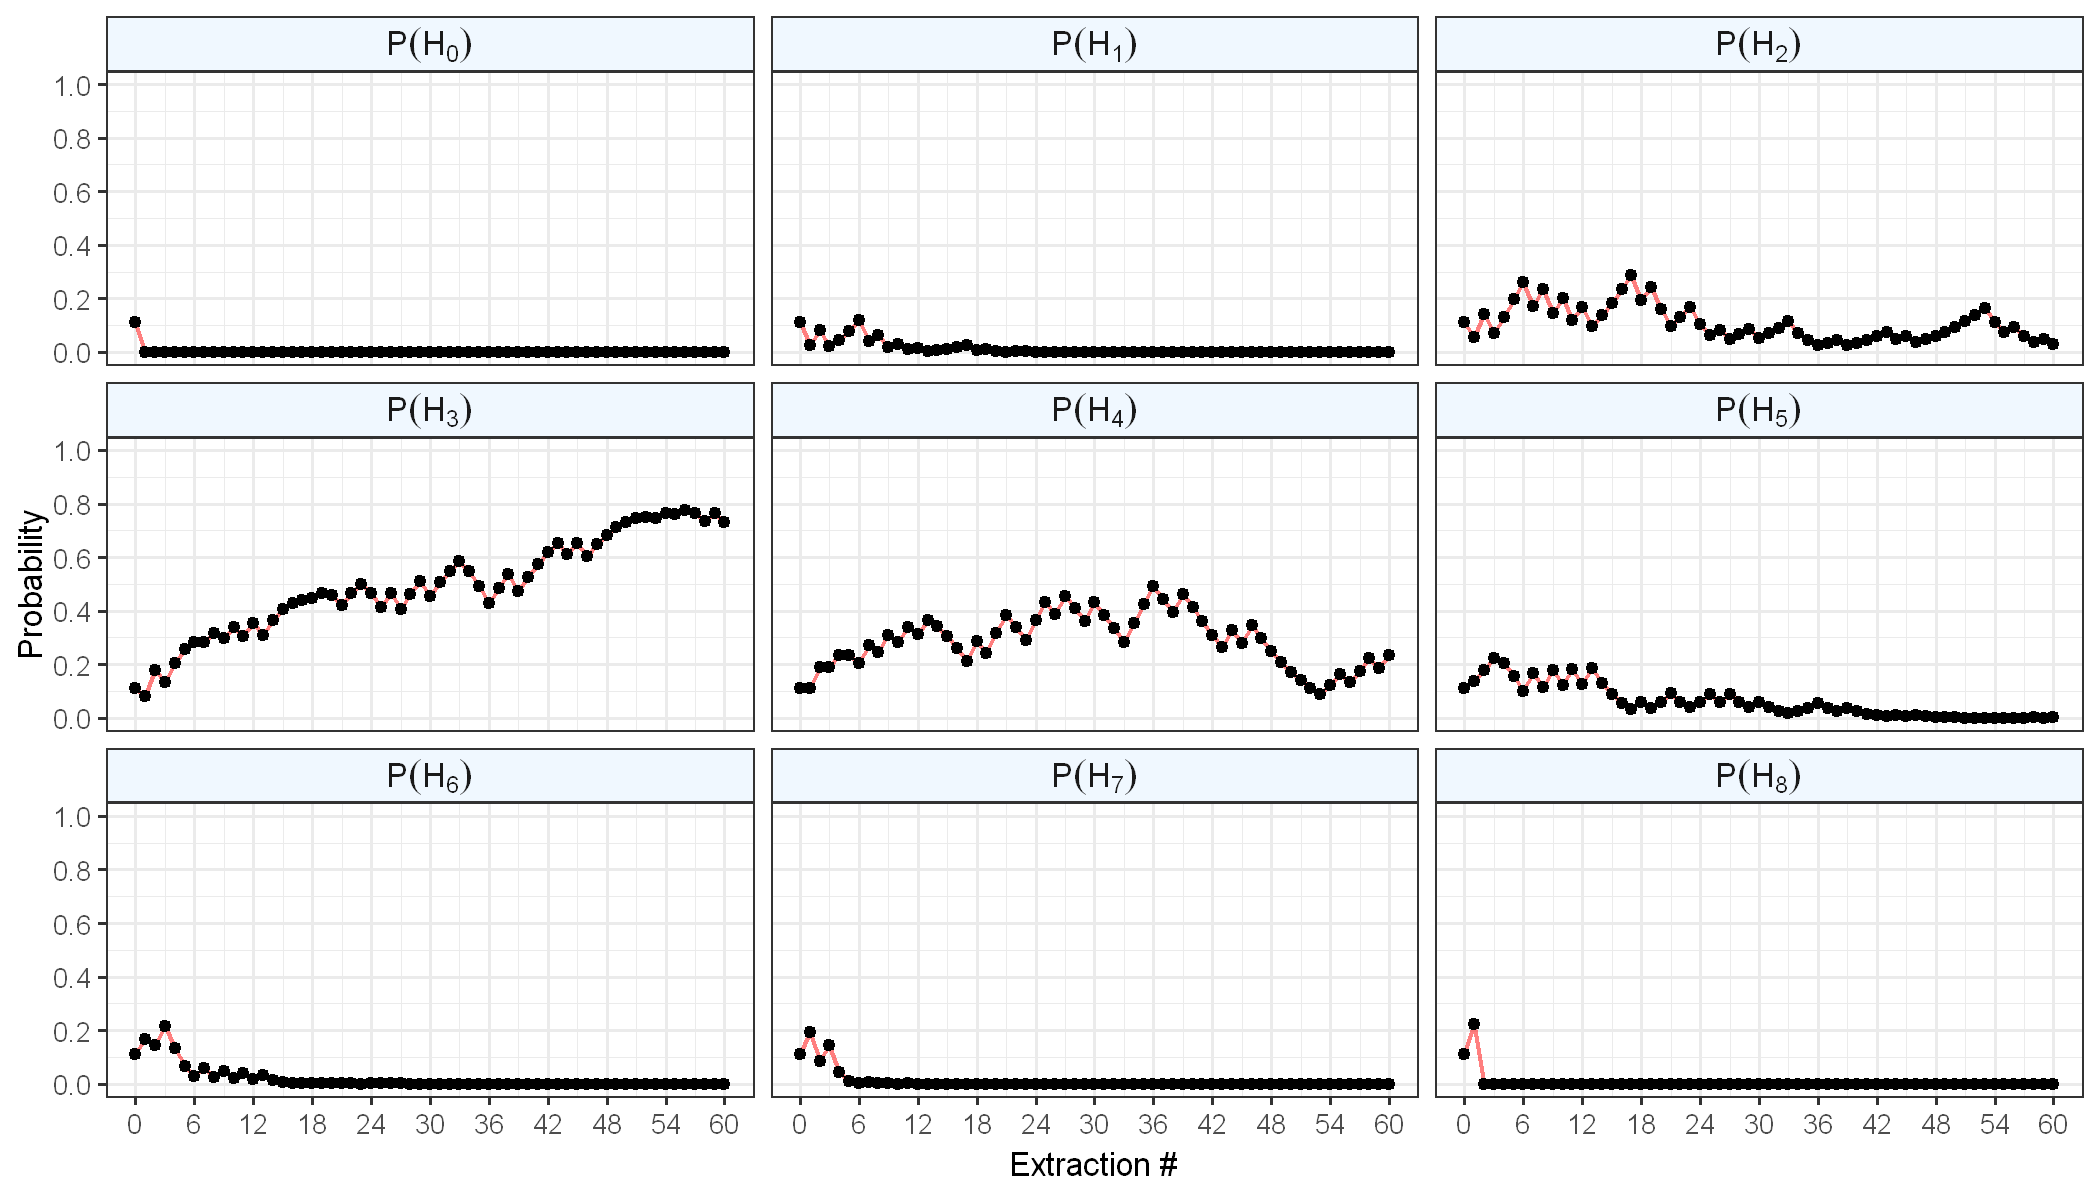

In [19]:
load_box_toy(n_boxes=9, type='simulation', n_extractions=60)

## **References**

<a id='ref1'></a>
**[1]** G. D’Agostini, *Probability, propensity and probabilities of propensities (and of probabilities)*, https://arxiv.org/pdf/1612.05292.pdf

<a id='ref2'></a>
**[2]** G. D’Agostini, *More lessons from the six box toy experiment*, https://arxiv.org/pdf/1701.01143.pdf